In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('newdata.csv', index_col=[0])
df.index.name = 'id'
df.head()
y = df['smoking']
x = df.drop('smoking', axis=1)
X_train, X_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
df_train = pd.concat([X_train, y_train], axis=1)
df_train.head()

LDL  weight(kg)  systolic  Cholesterol  ALT  Gtp  triglyceride  \
id                                                                      
17406   93          70       136          172   36   72           190   
61303  116          60       117          205   25   95            59   
71781   95          50        94          186   14   15           145   
67014   95          55       100          167   27   21            59   
73322  104          55       136          171   15   13           110   

       Urine protein  dental caries  height(cm)  smoking  
id                                                        
17406              1              1         165        1  
61303              1              0         160        1  
71781              1              0         160        1  
67014              1              0         155        0  
73322              1              0         155        0

In [3]:
cat, numerical = [], []
for col in df.columns:
    if df[col].nunique() > 10:
        numerical.append(col)
    else:
        cat.append(col)
print(cat)
print(numerical)

['Urine protein', 'dental caries', 'smoking']
['LDL', 'weight(kg)', 'systolic', 'Cholesterol', 'ALT', 'Gtp', 'triglyceride', 'height(cm)']


uni varient categorical analysis

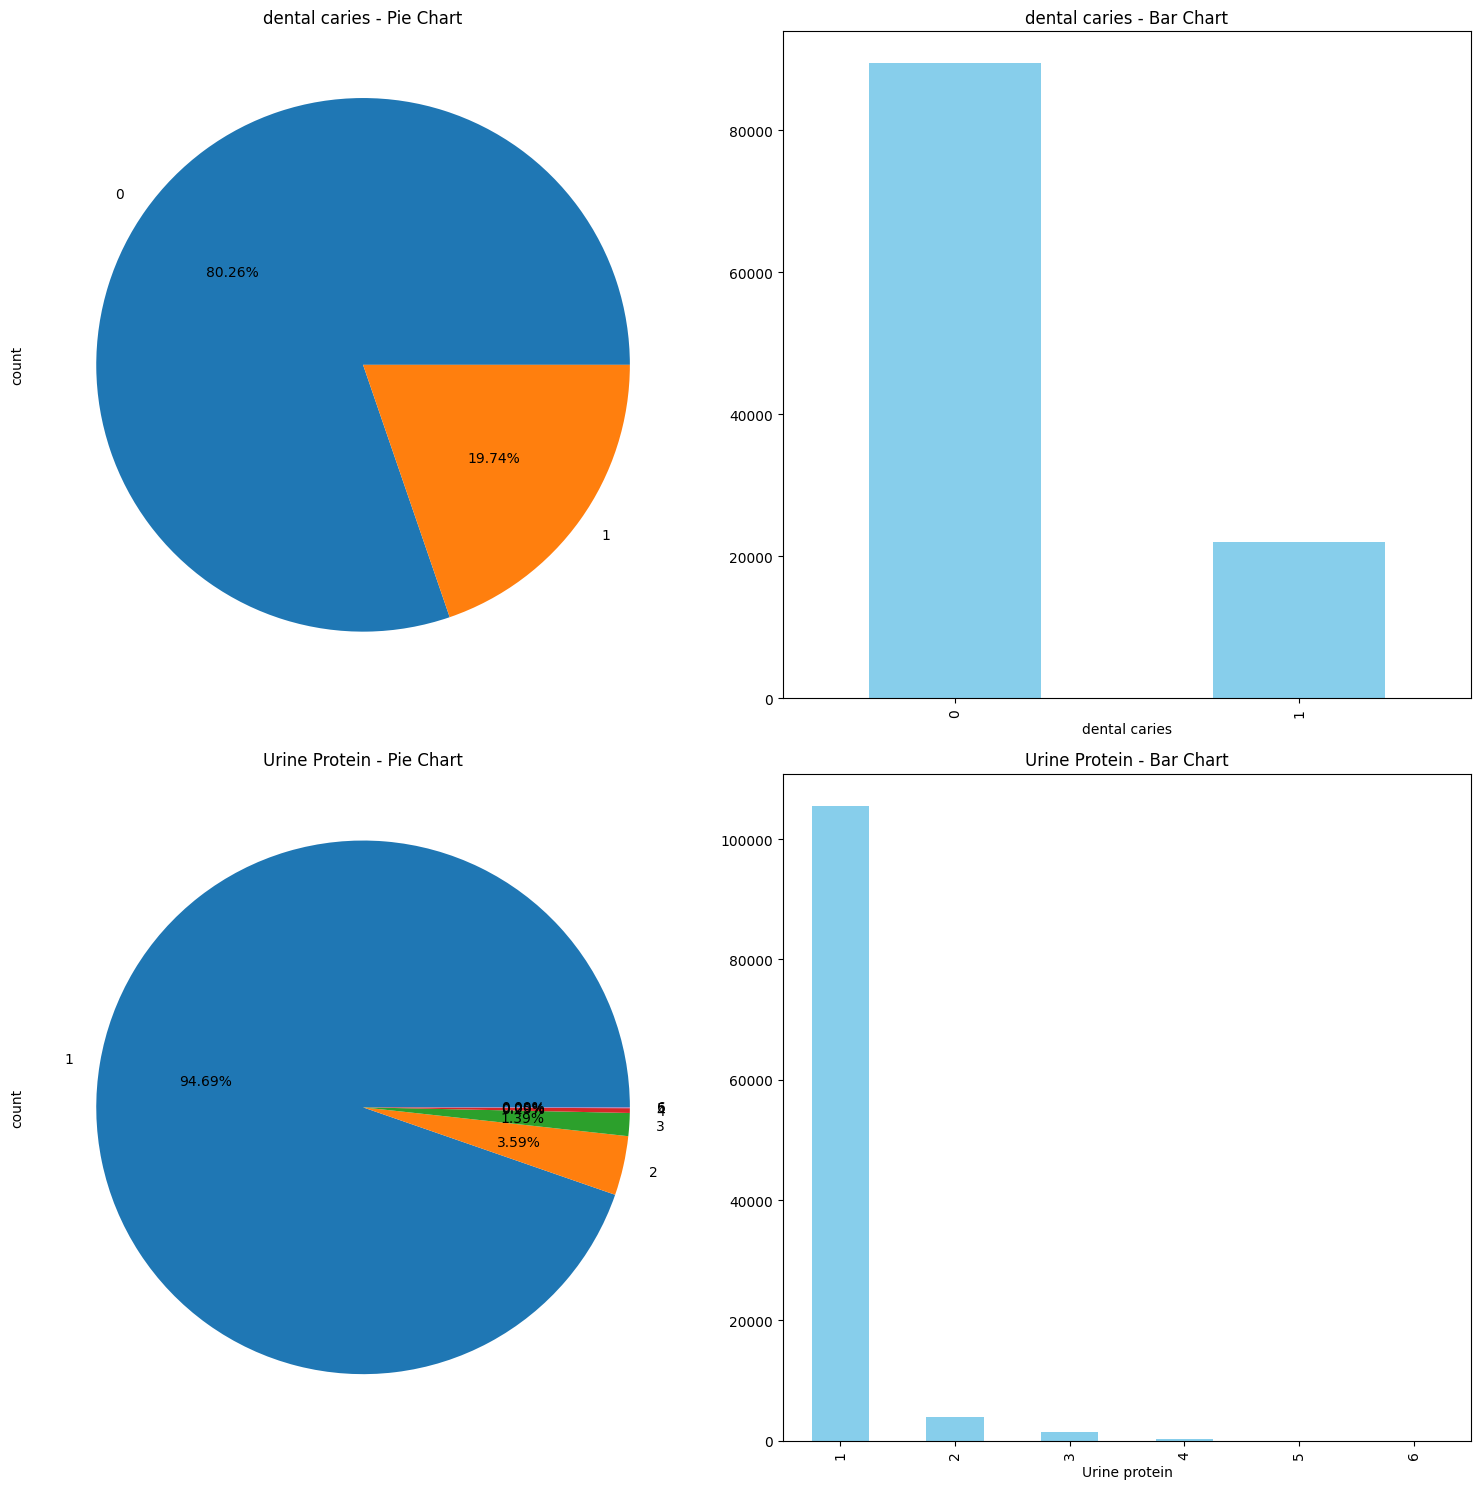

In [4]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

df_train['dental caries'].value_counts().plot(kind="pie", autopct="%1.2f%%", ax=axs[0, 0])
axs[0, 0].set_title('dental caries - Pie Chart')
df_train['dental caries'].value_counts().plot(kind="bar", ax=axs[0, 1], color='skyblue')
axs[0, 1].set_title('dental caries - Bar Chart')

df_train['Urine protein'].value_counts().plot(kind="pie", autopct="%1.2f%%", ax=axs[1, 0])
axs[1, 0].set_title('Urine Protein - Pie Chart')
df_train['Urine protein'].value_counts().plot(kind="bar", ax=axs[1, 1], color='skyblue')
axs[1, 1].set_title('Urine Protein - Bar Chart')

plt.tight_layout()#prevent overlapping
plt.show()

univarient , numerical
['LDL']


<Axes: ylabel='LDL'>

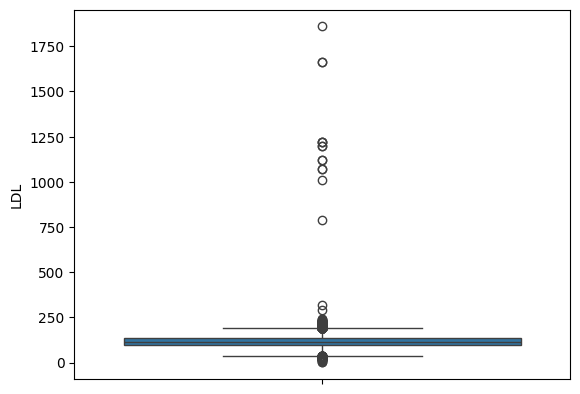

In [5]:
sns.boxplot(df['LDL'])

univarient , numerical
['weight(kg)']

<Axes: ylabel='weight(kg)'>

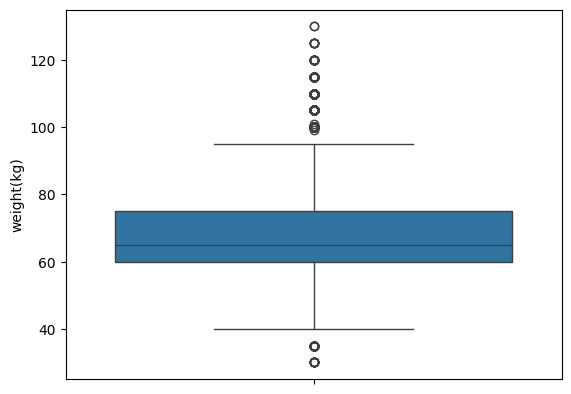

In [6]:
sns.boxplot(df['weight(kg)'])

univarient , numerical
['systolic']

<Axes: ylabel='systolic'>

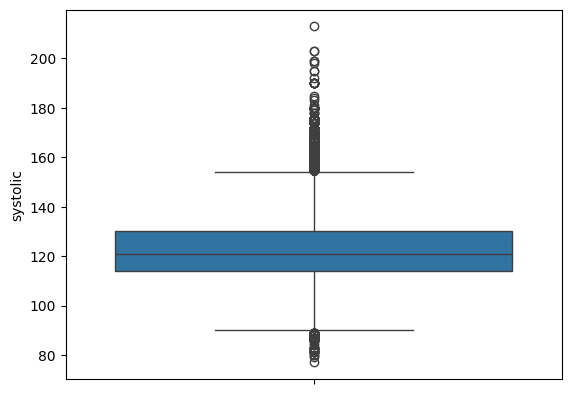

In [7]:
sns.boxplot(df['systolic'])

univarient , numerical
['Cholesterol']

<Axes: ylabel='Cholesterol'>

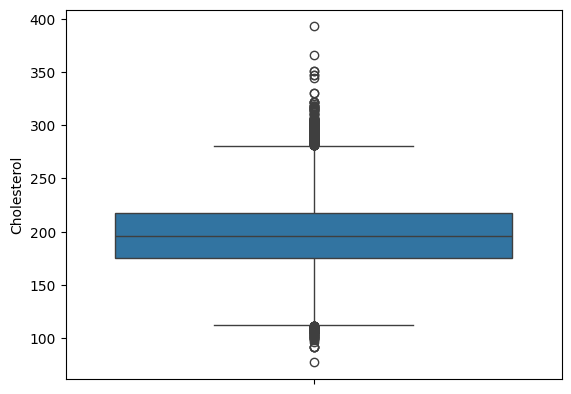

In [8]:
sns.boxplot(df['Cholesterol'])

univarient , numerical
['ALT']

C:\Users\Moham\AppData\Local\Temp\ipykernel_5616\439315227.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ALT'])


<Axes: xlabel='ALT', ylabel='Density'>

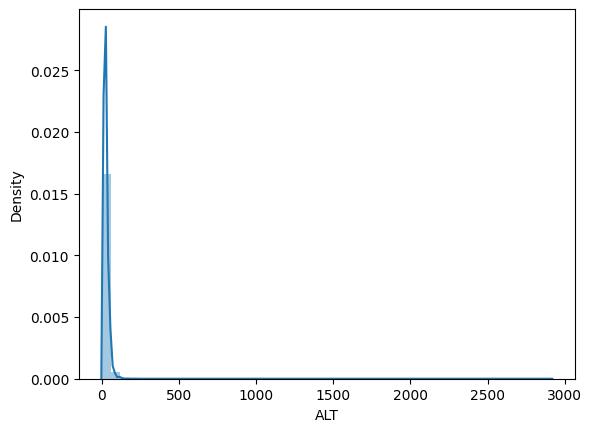

In [9]:
sns.distplot(df['ALT'])

univarient , numerical
['Gtp']

C:\Users\Moham\AppData\Local\Temp\ipykernel_5616\2799529790.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Gtp'])


<Axes: xlabel='Gtp', ylabel='Density'>

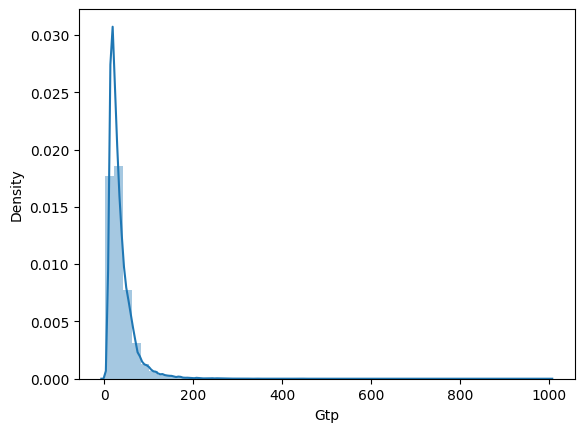

In [10]:
sns.distplot(df['Gtp'])

univarient , numerical
['triglyceride']

<Axes: ylabel='triglyceride'>

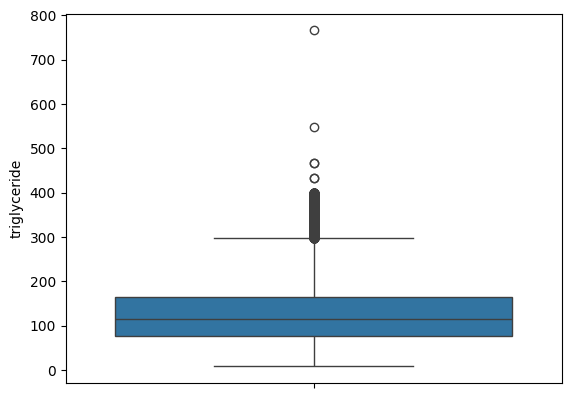

In [11]:
sns.boxplot(df['triglyceride'])

univarient , numerical ['height(cm)']

<Axes: ylabel='height(cm)'>

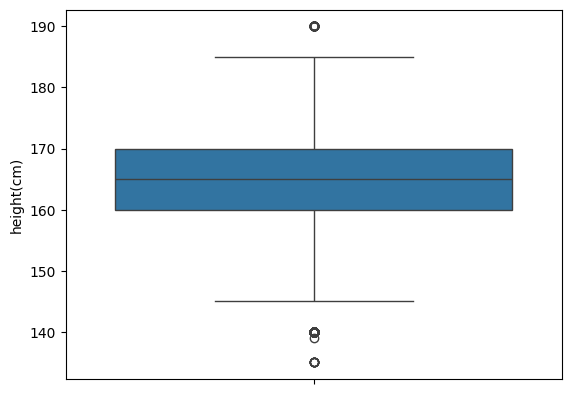

In [12]:
sns.boxplot(df['height(cm)'])

BI Varient  (numerical , categorical)

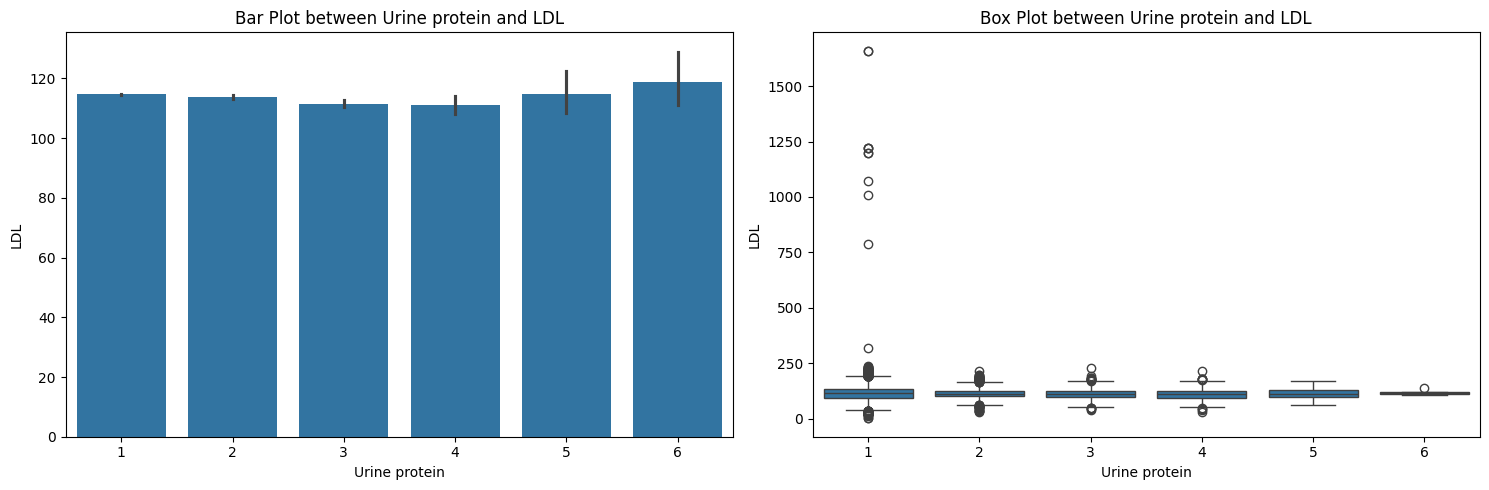

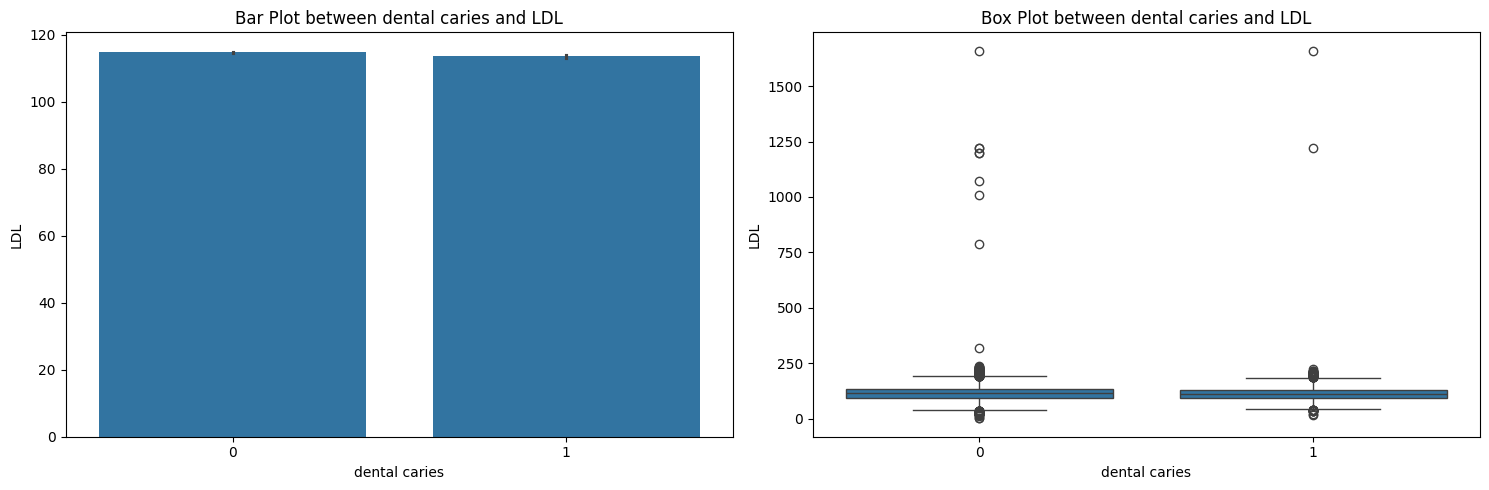

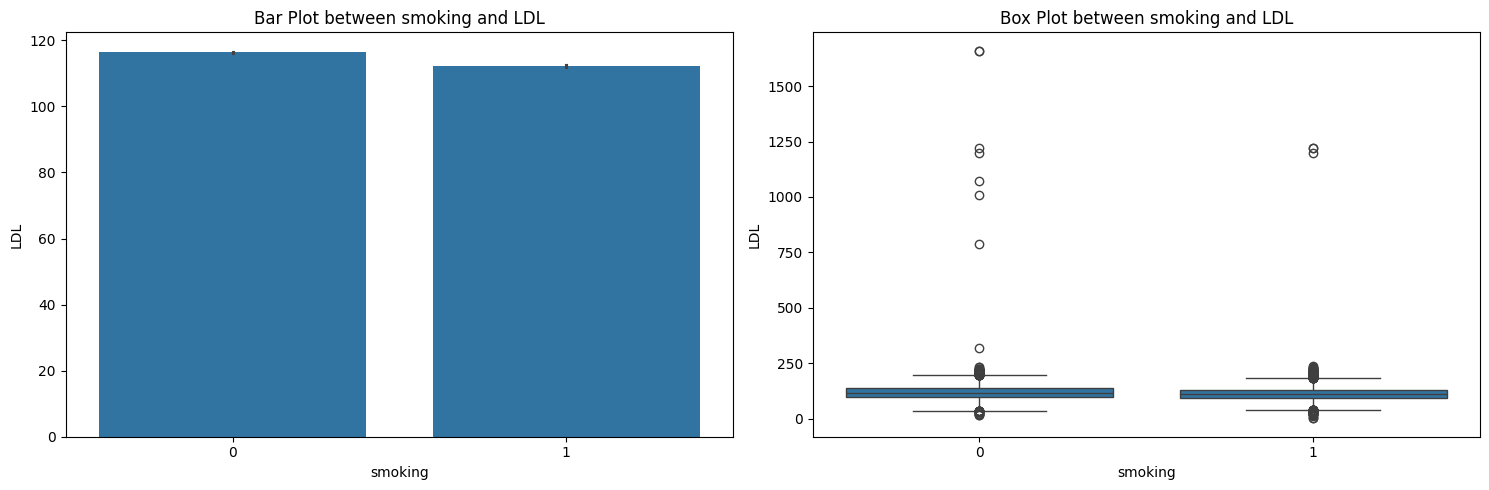

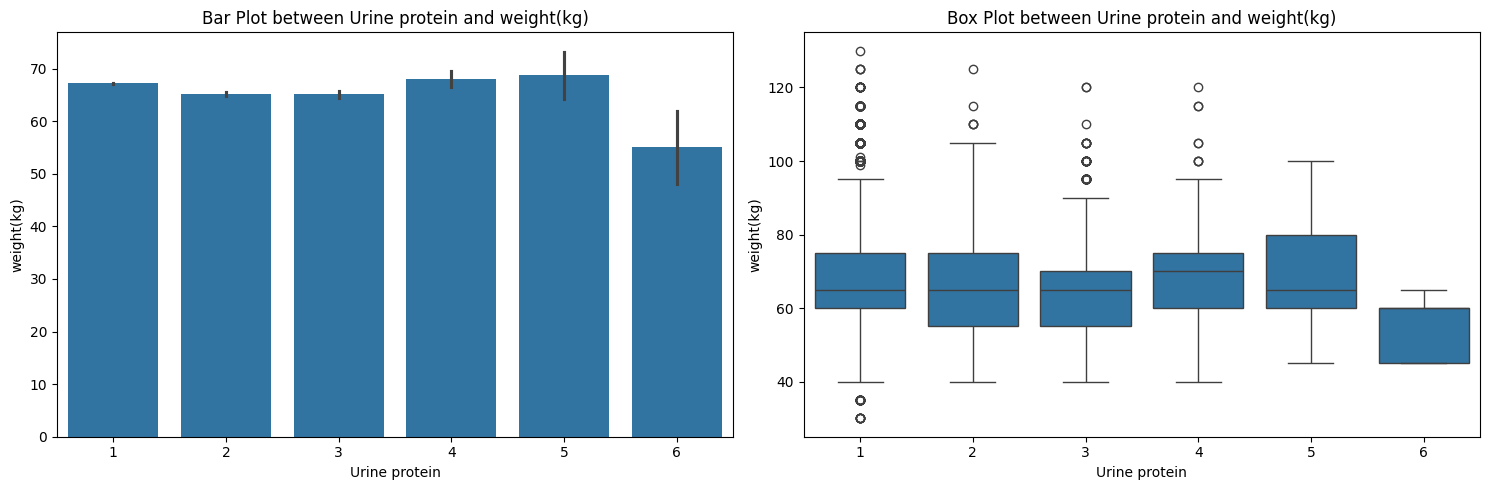

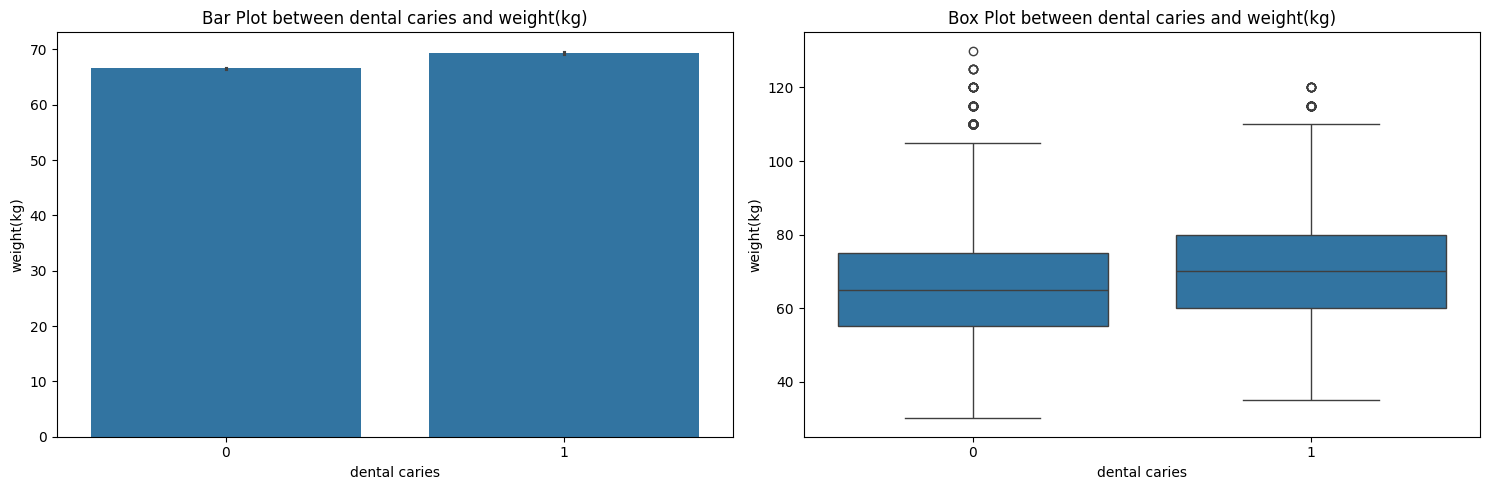

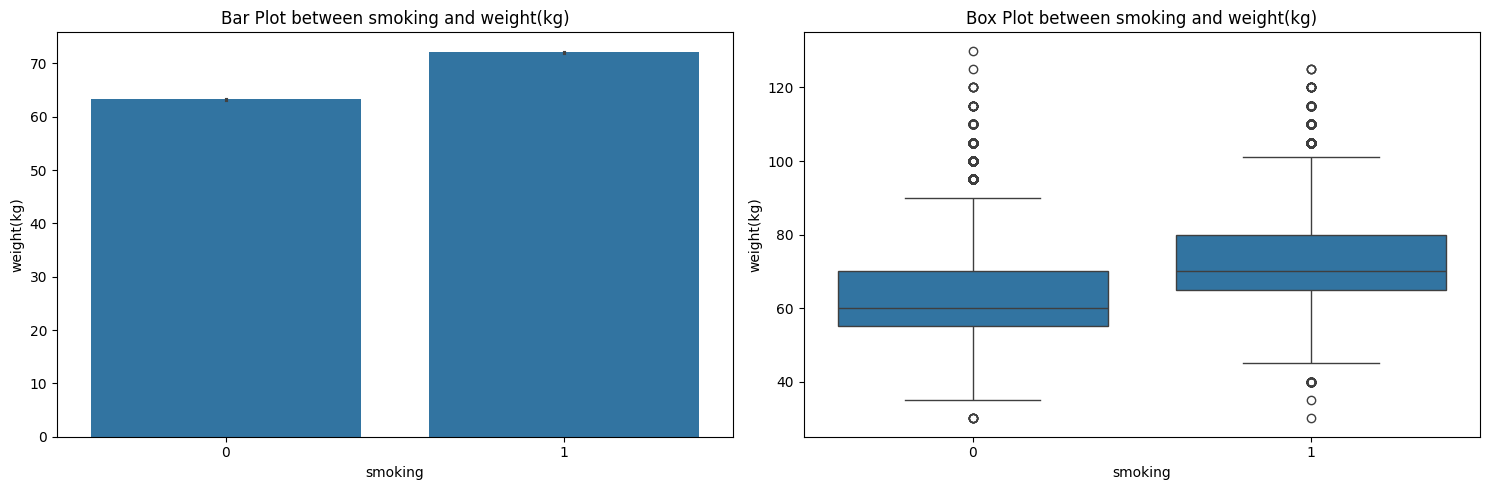

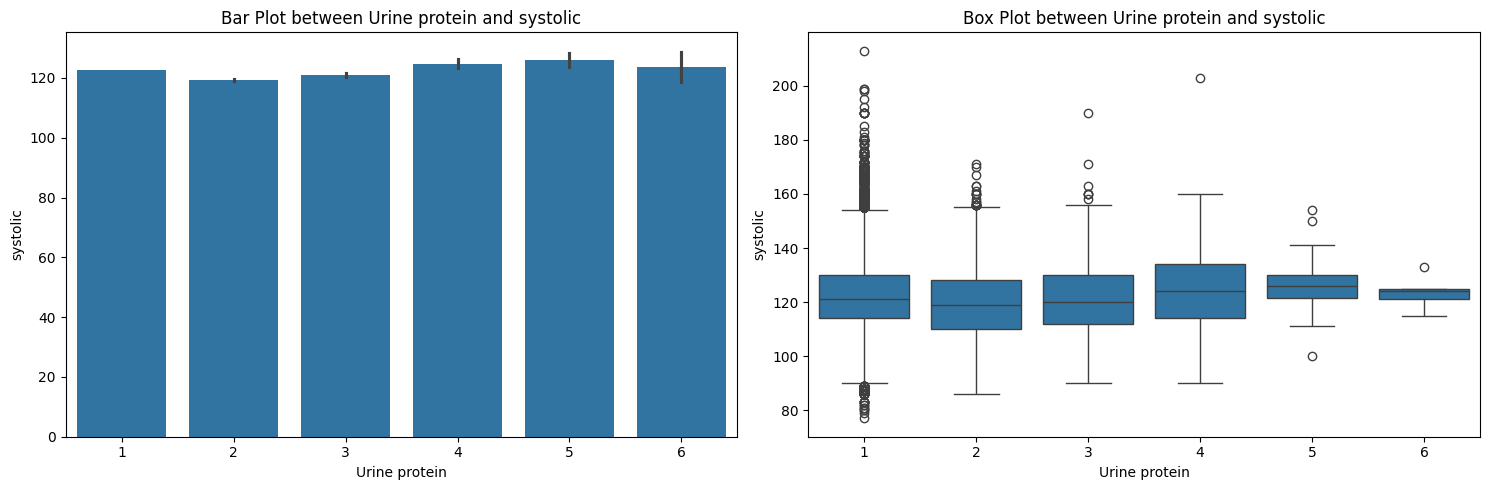

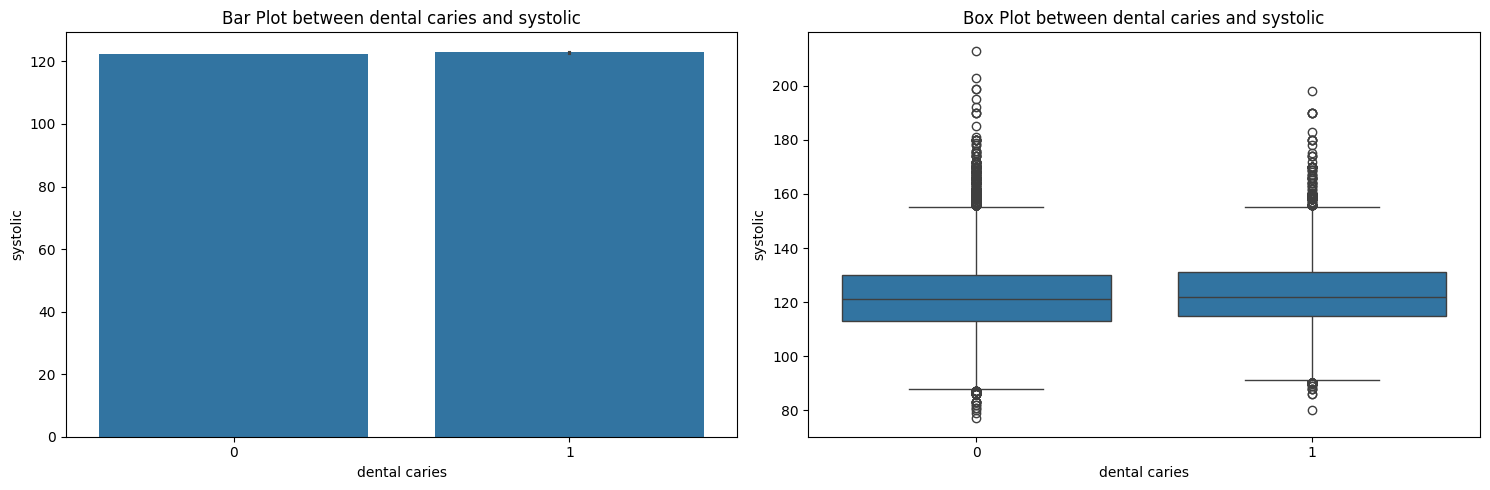

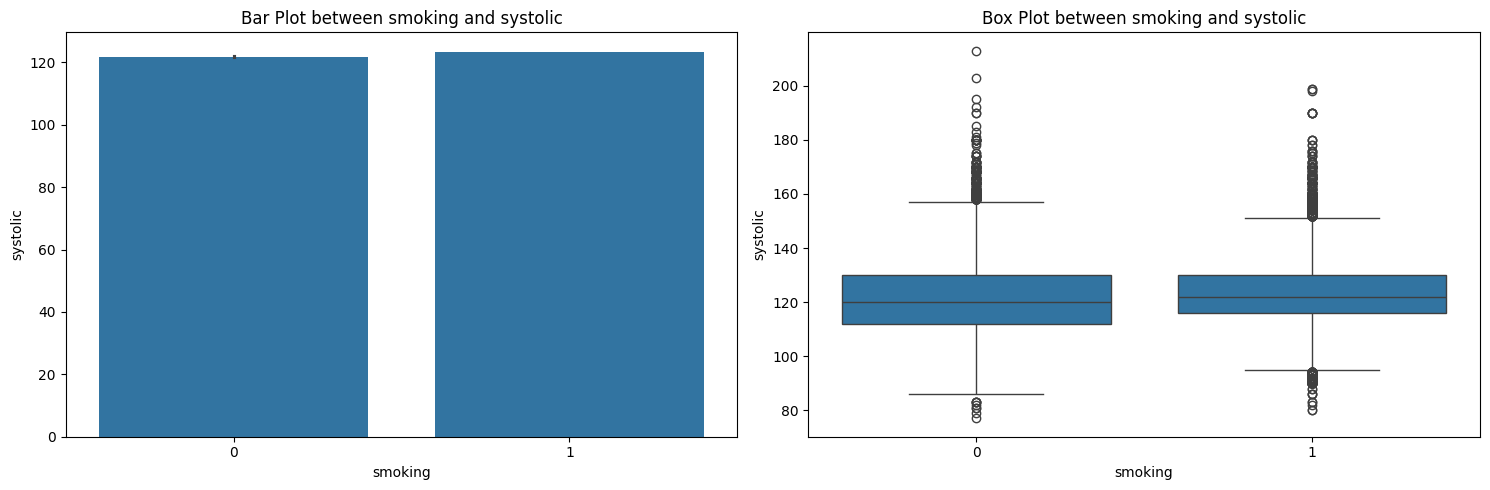

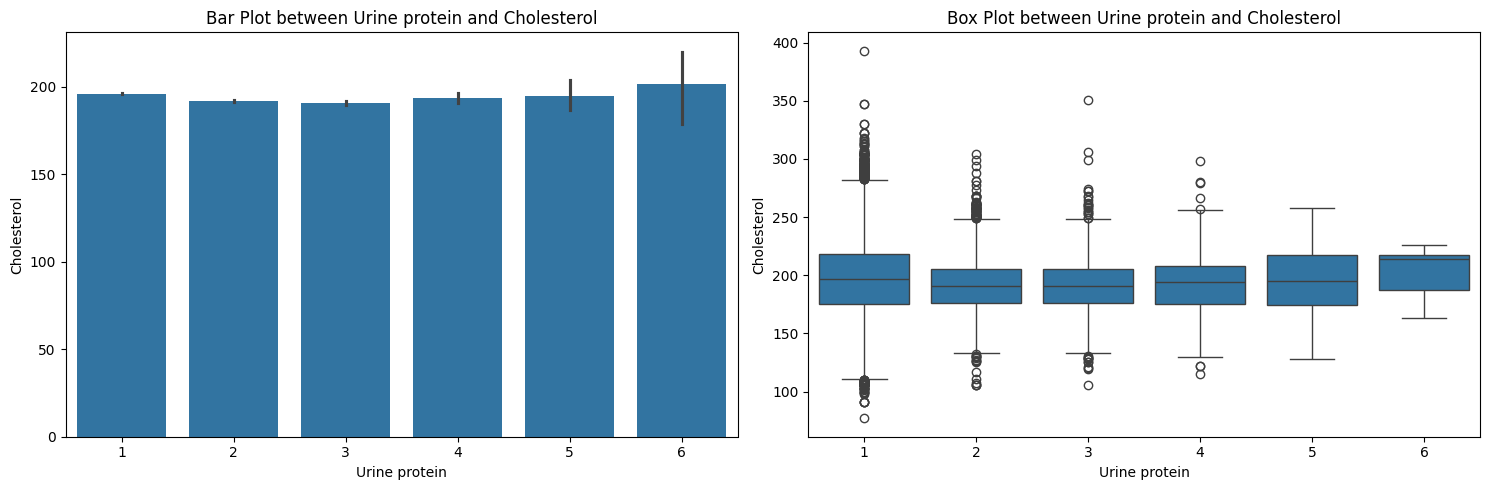

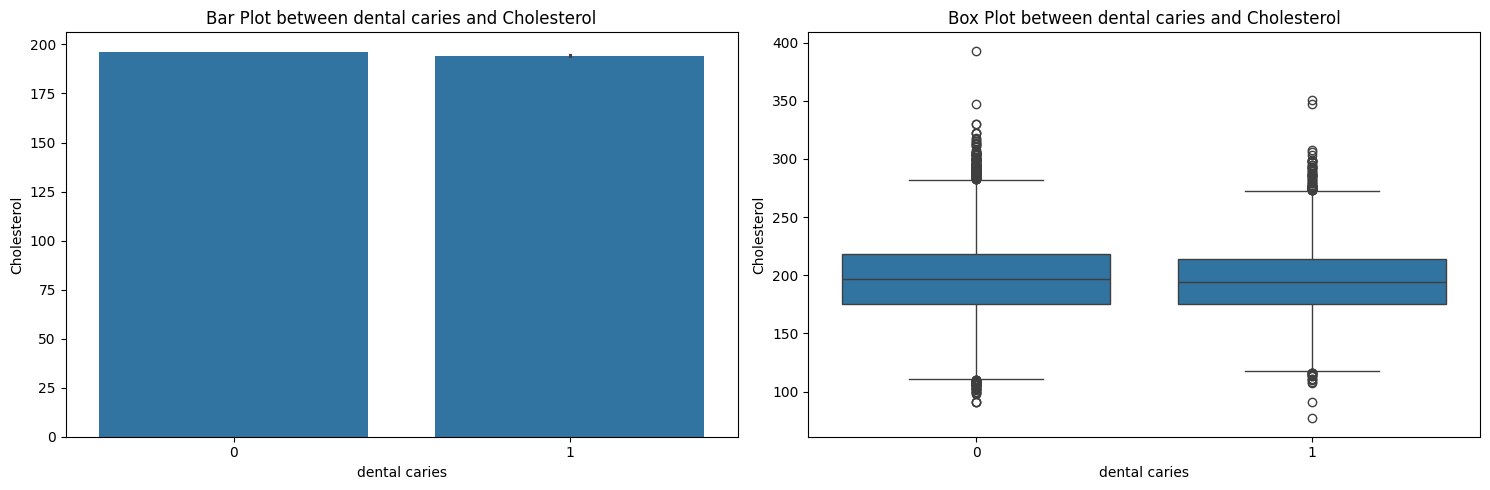

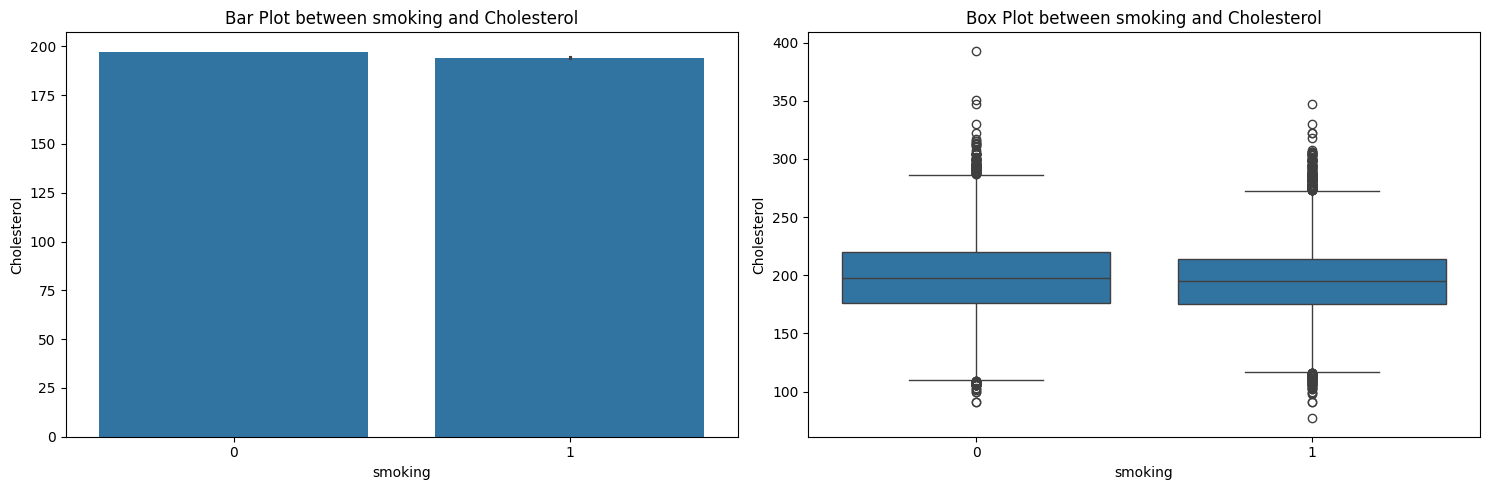

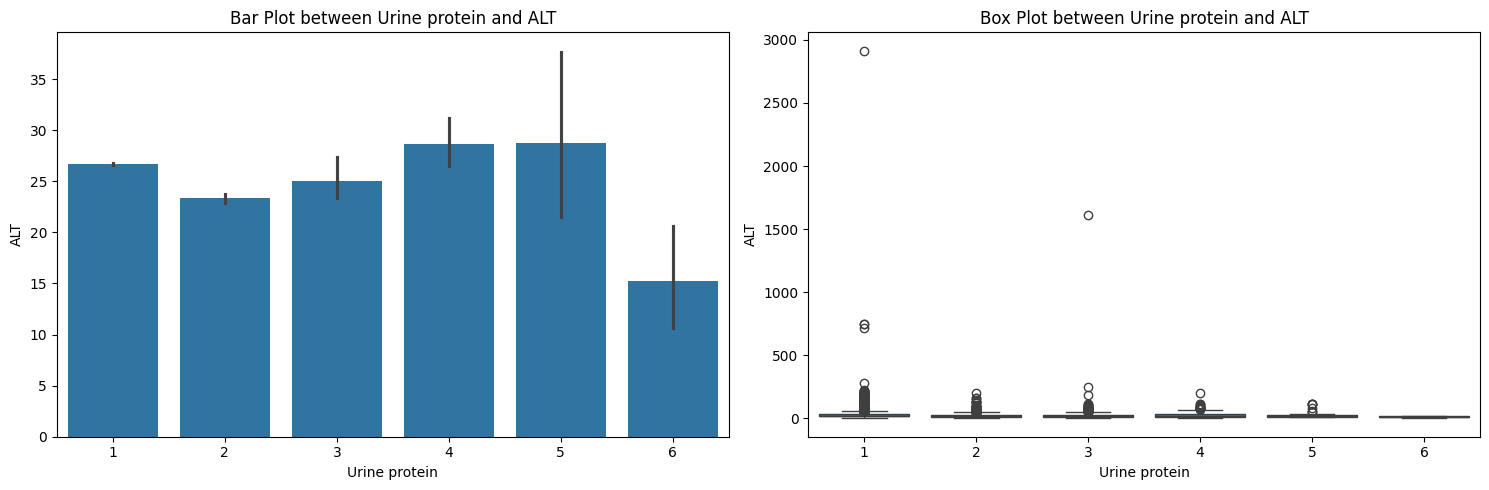

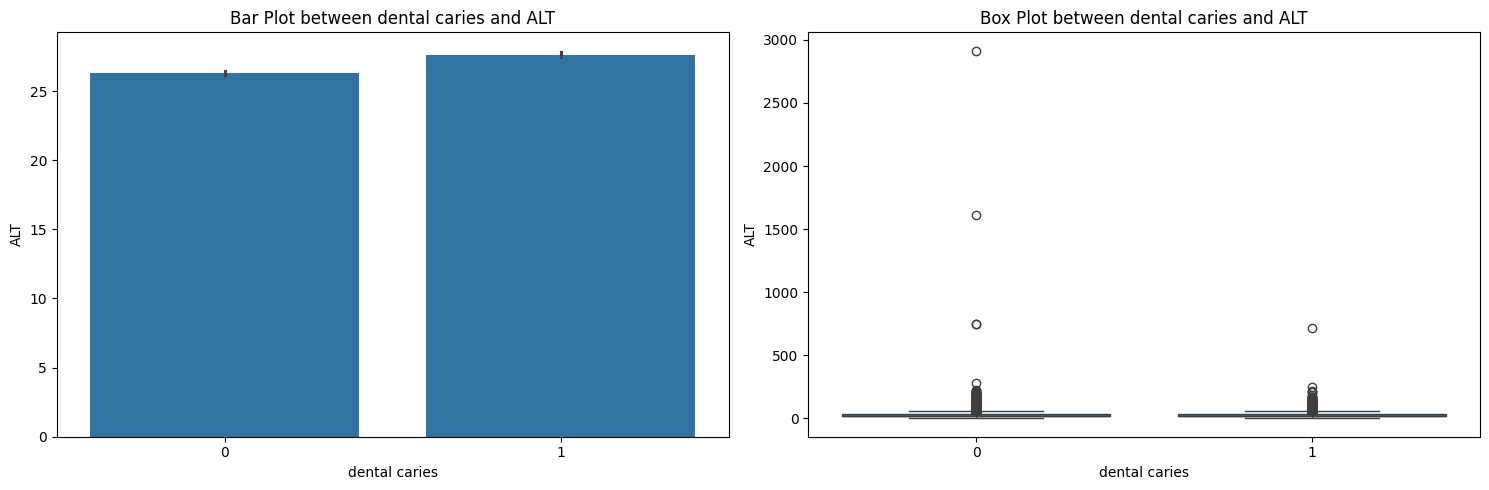

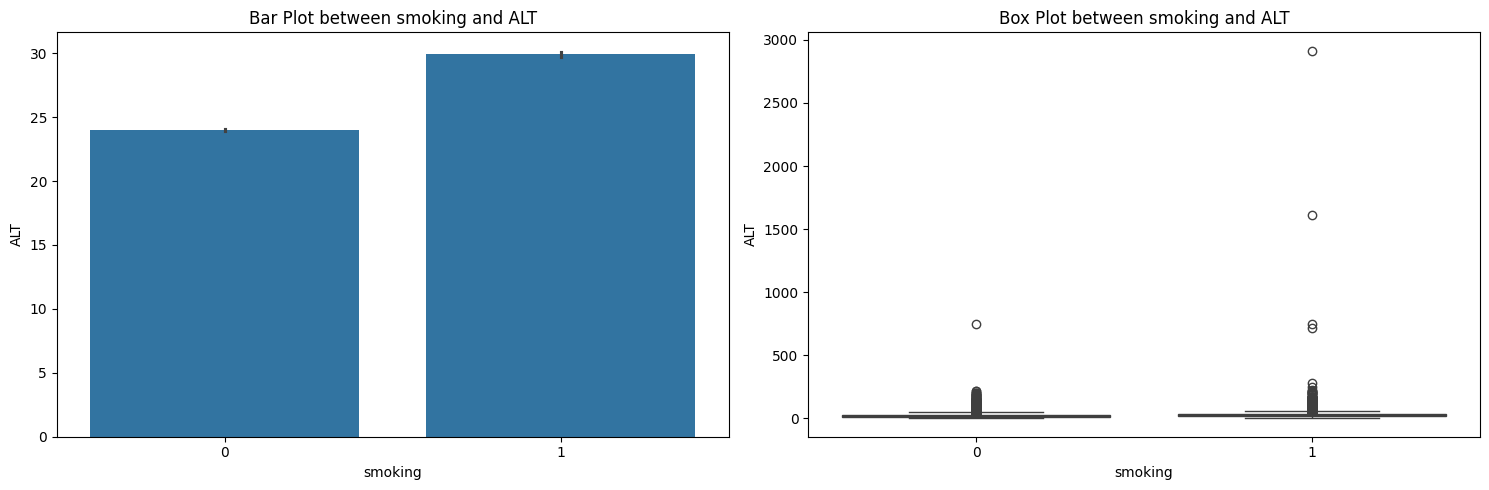

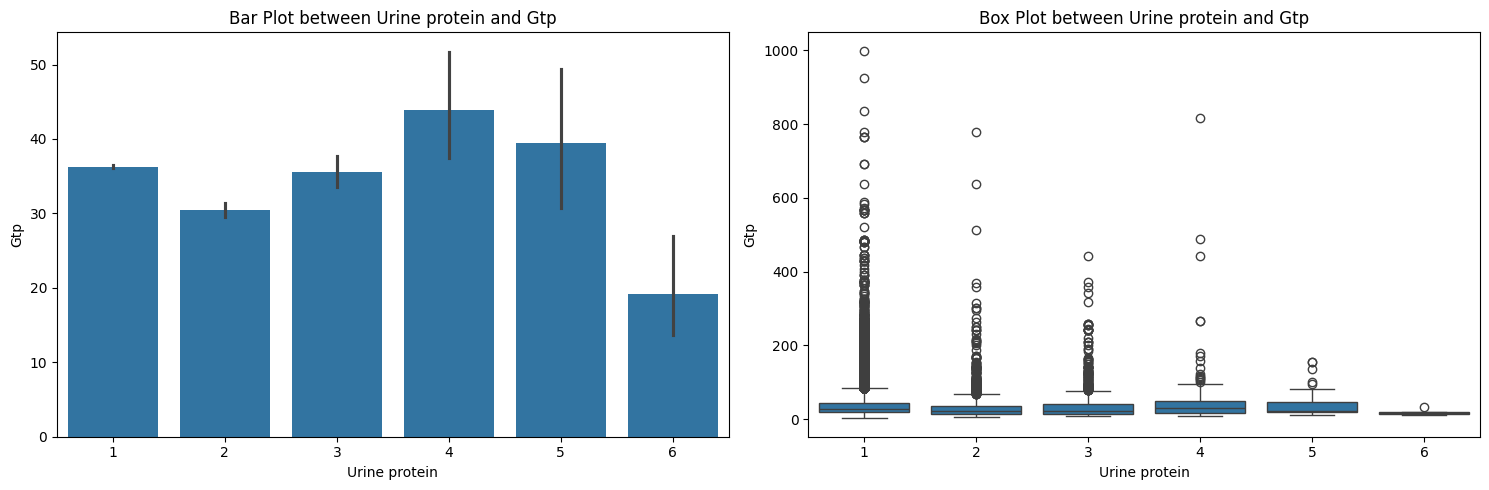

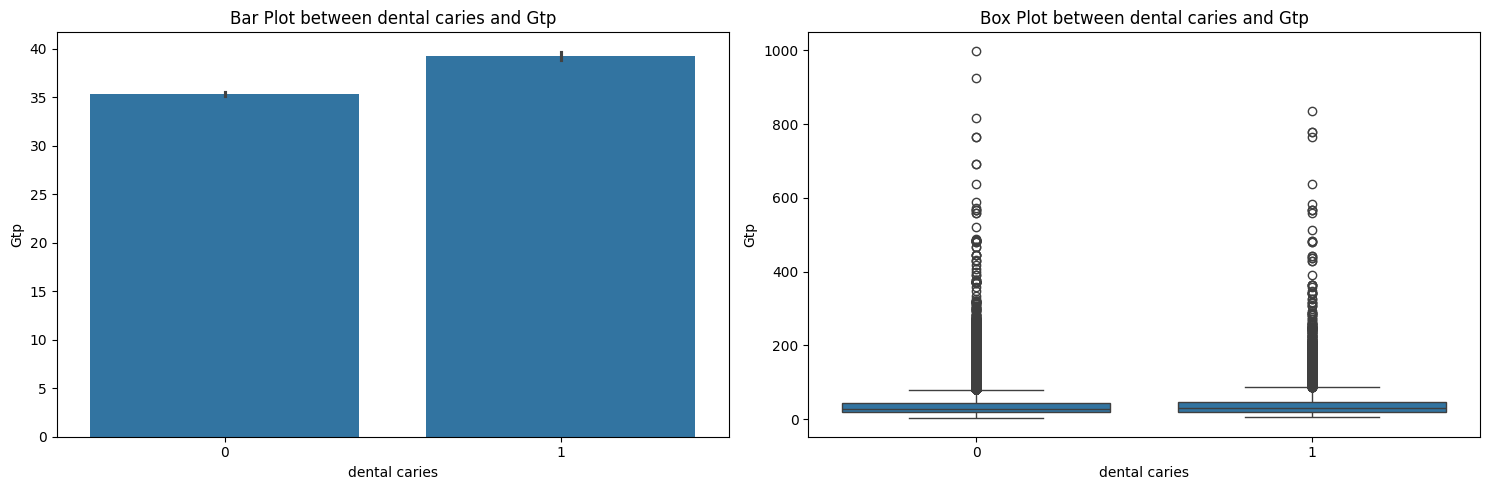

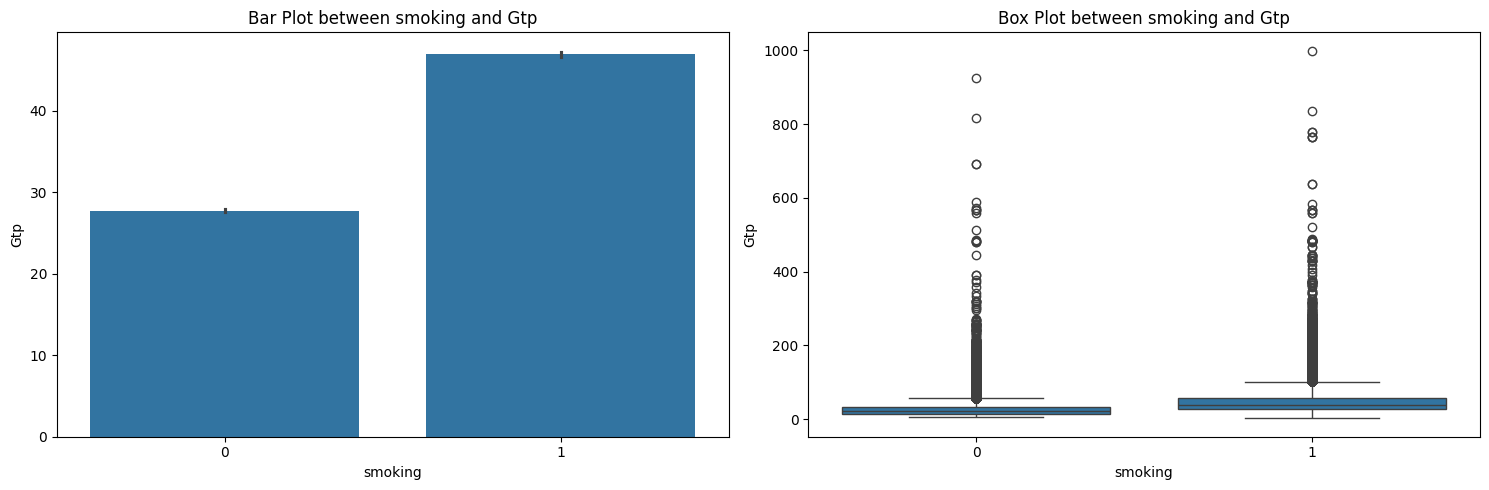

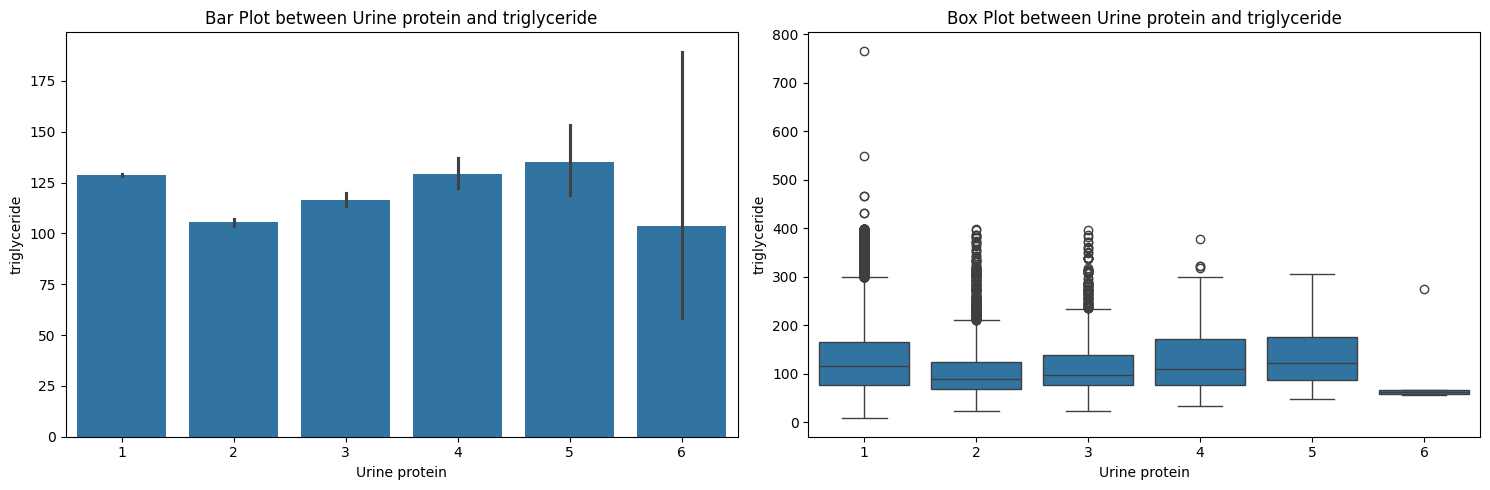

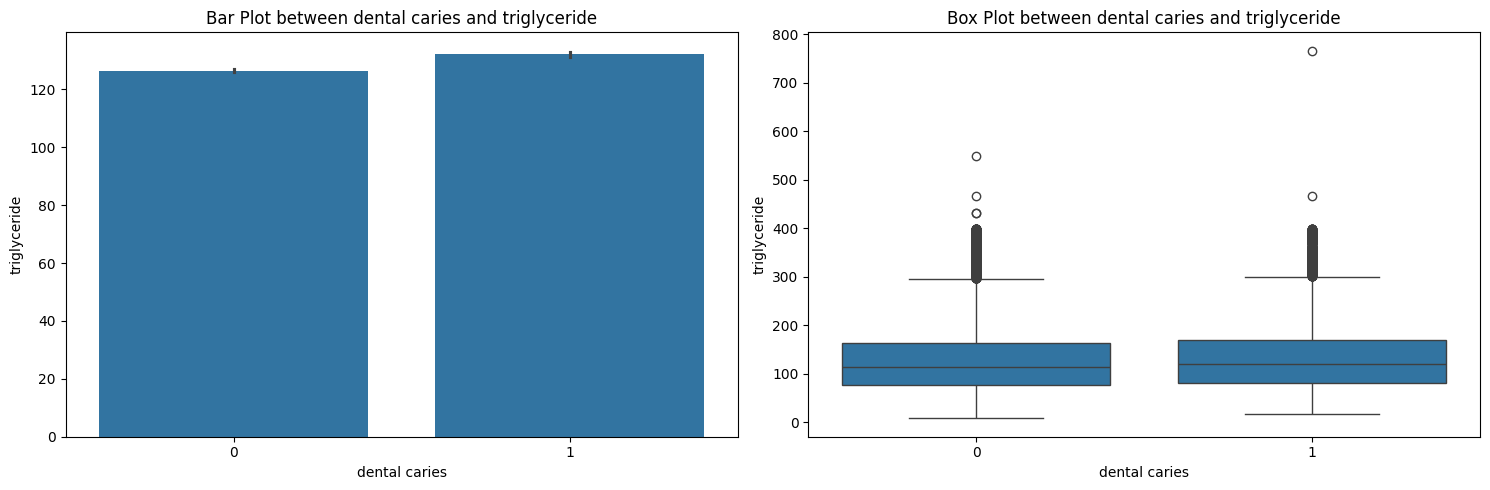

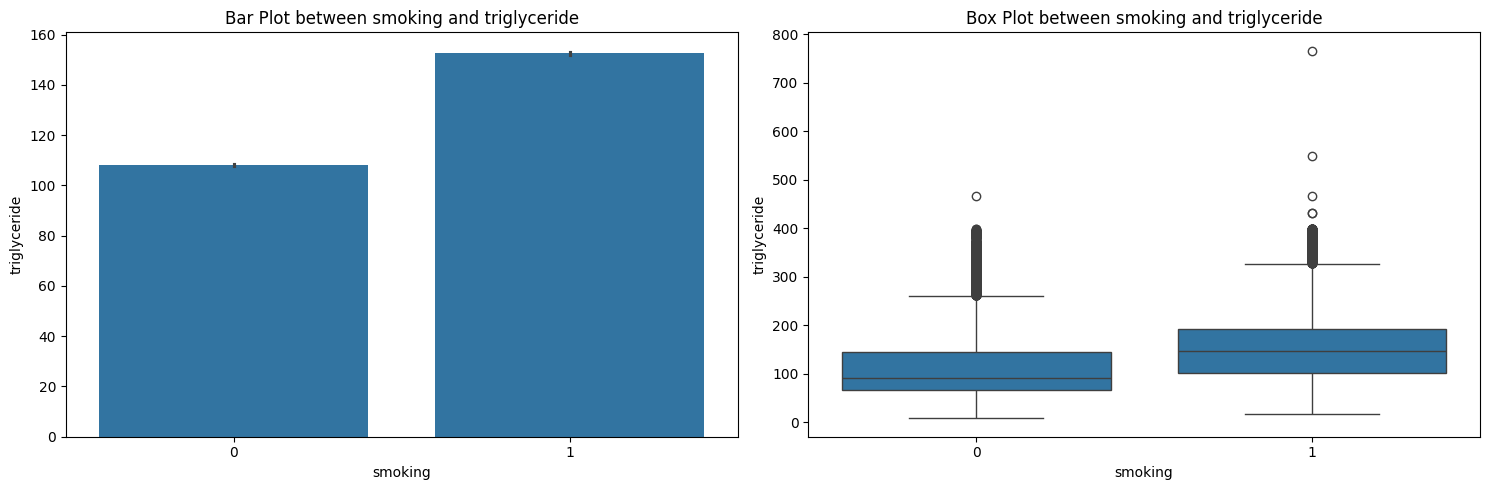

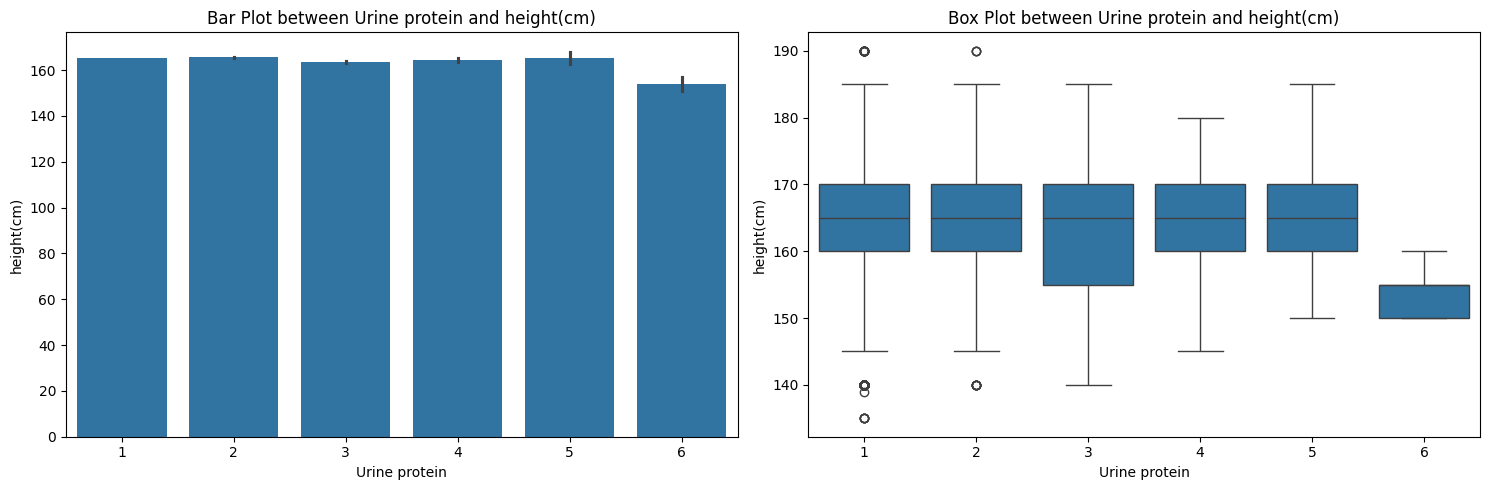

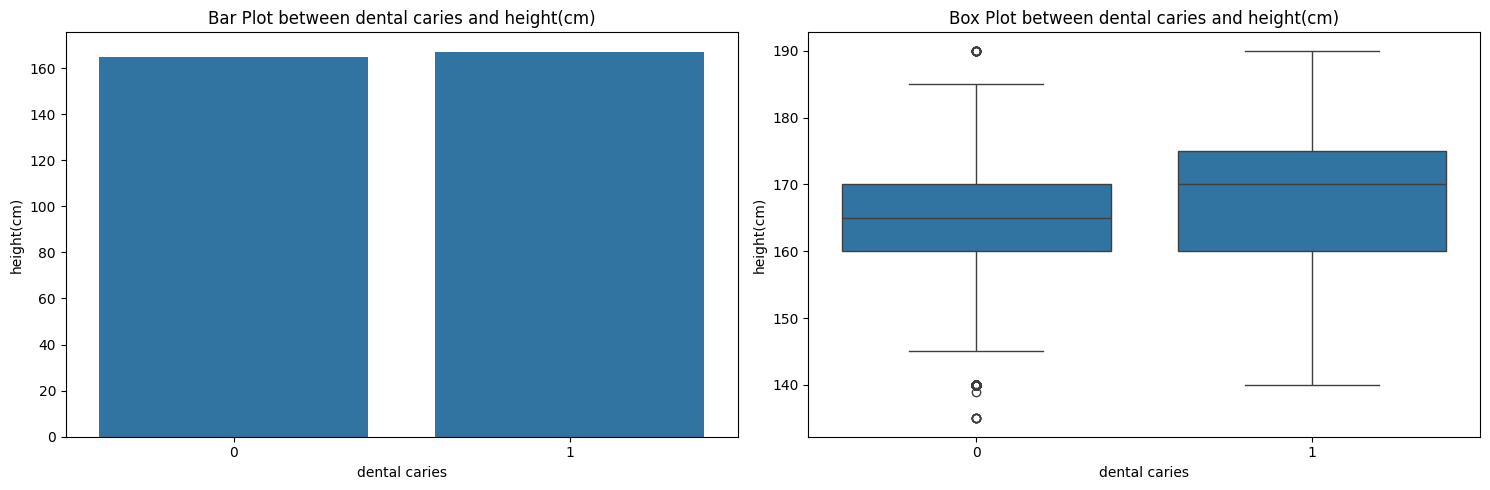

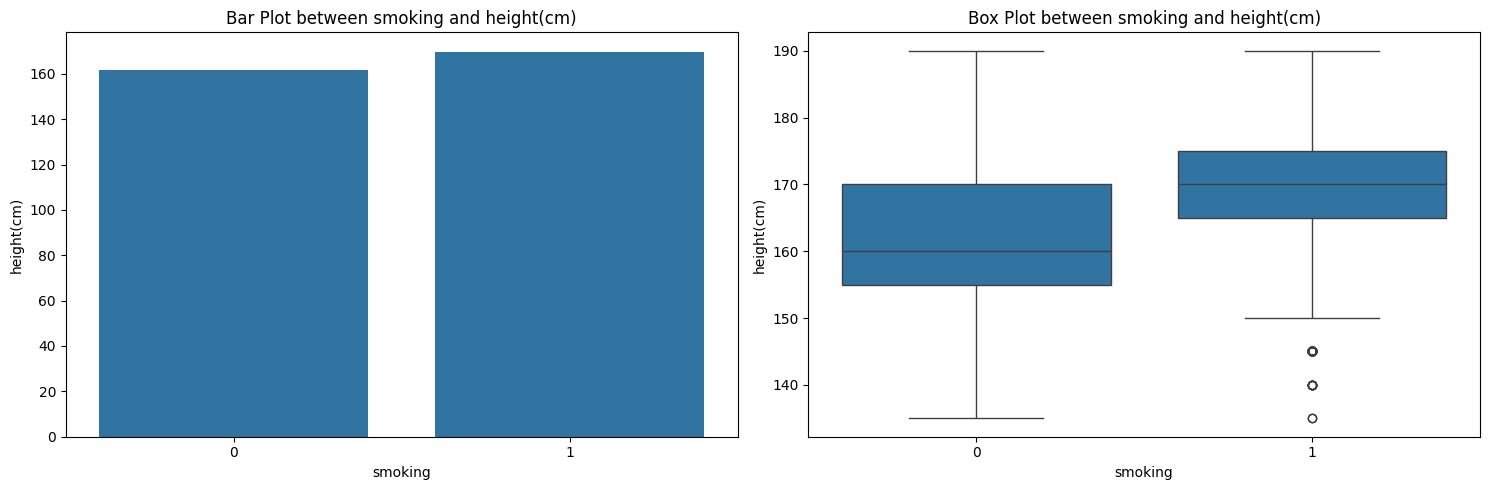

In [13]:
for n in numerical:
    for n2 in cat:
        fig, axs = plt.subplots(1, 2, figsize=(15, 5)) #create figure 1x2

        # Bar Plot
        sns.barplot(data=df_train, x=n2, y=n, ax=axs[0])
        axs[0].set_ylabel(n)
        axs[0].set_xlabel(n2)
        axs[0].set_title(f'Bar Plot between {n2} and {n}')

        # Box Plot
        sns.boxplot(data=df_train, x=n2, y=n, ax=axs[1])
        axs[1].set_ylabel(n)
        axs[1].set_xlabel(n2)
        axs[1].set_title(f'Box Plot between {n2} and {n}')

        plt.tight_layout() # prevent overlaping
        plt.show()

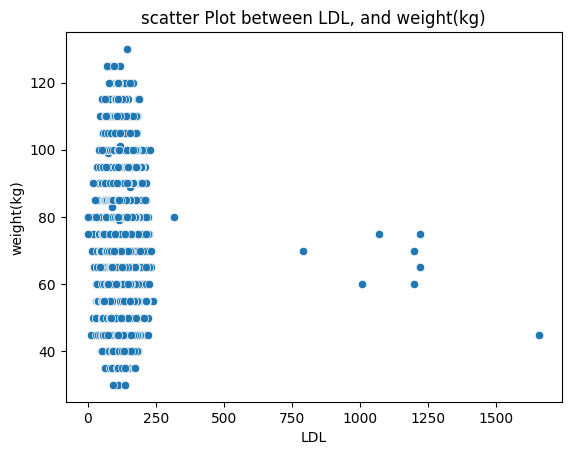

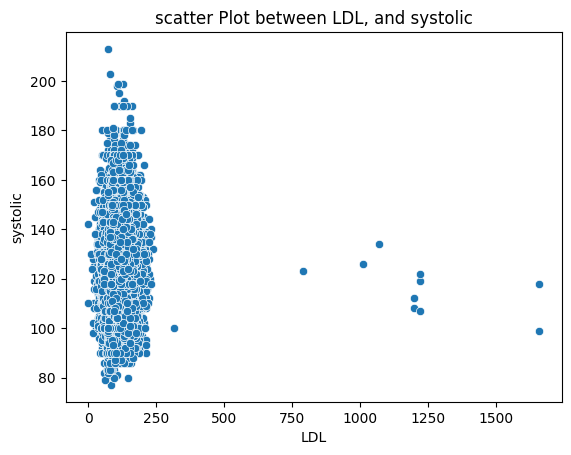

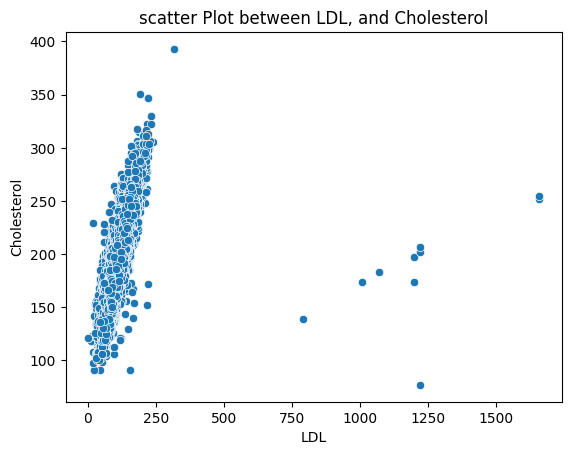

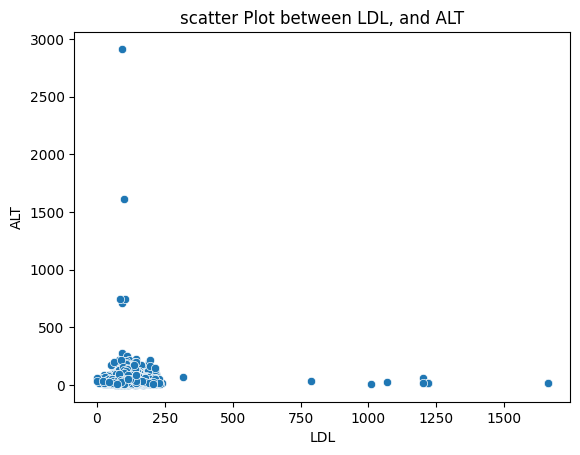

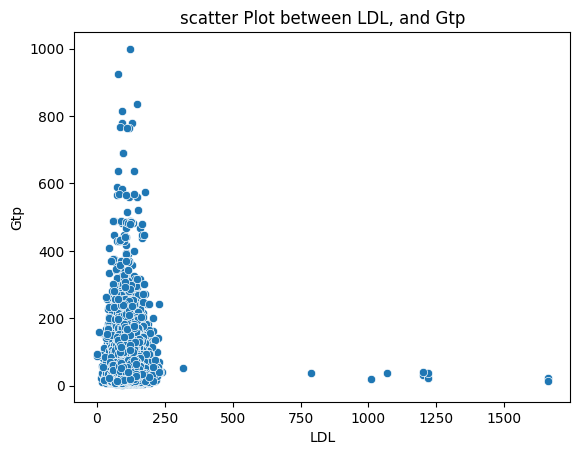

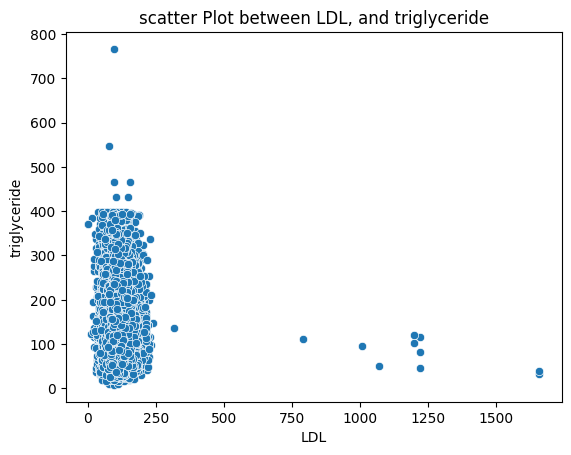

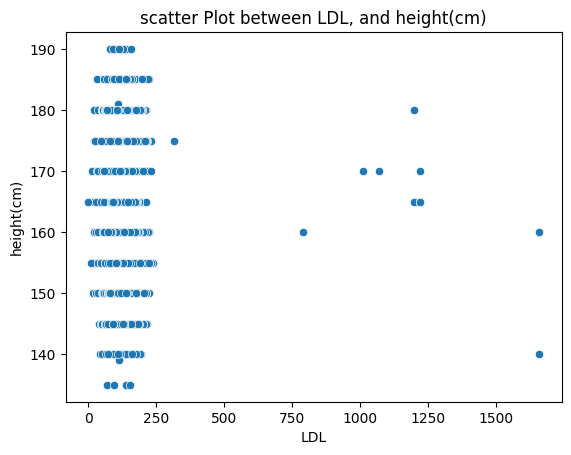

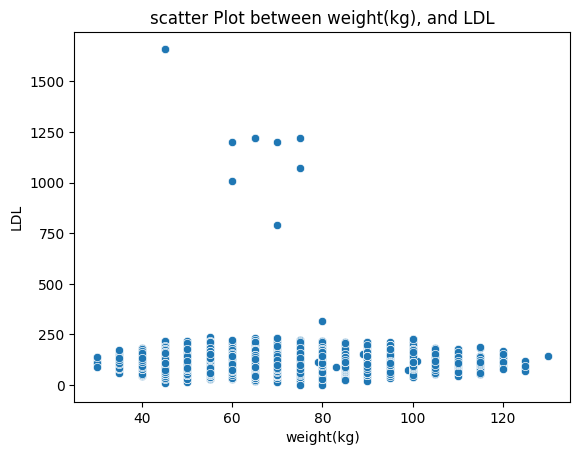

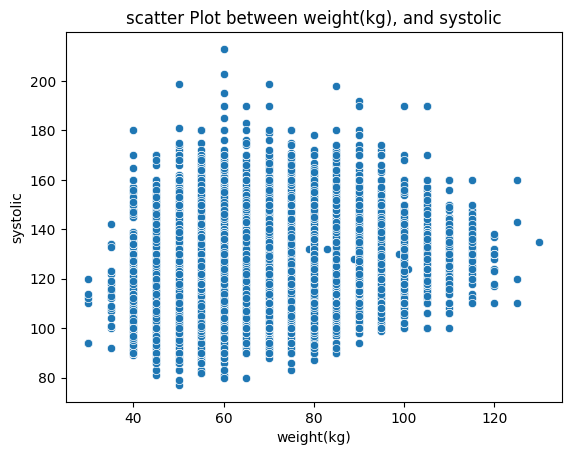

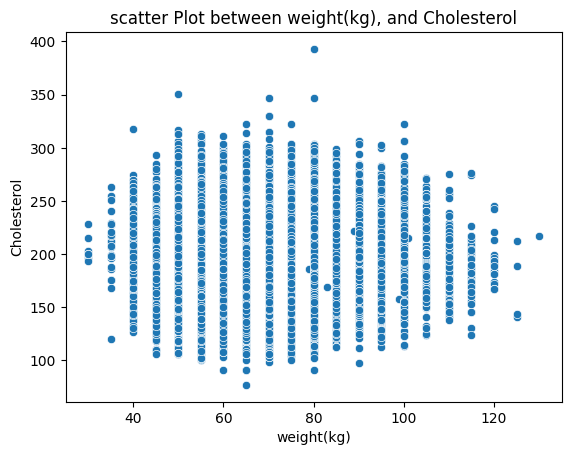

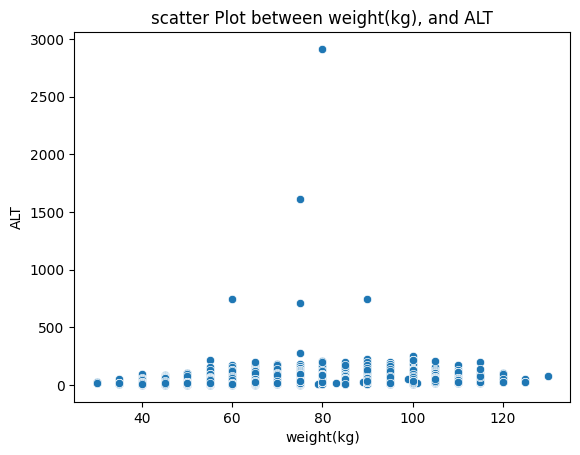

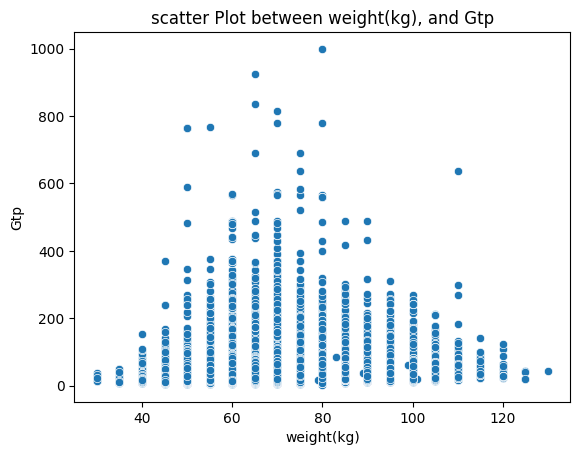

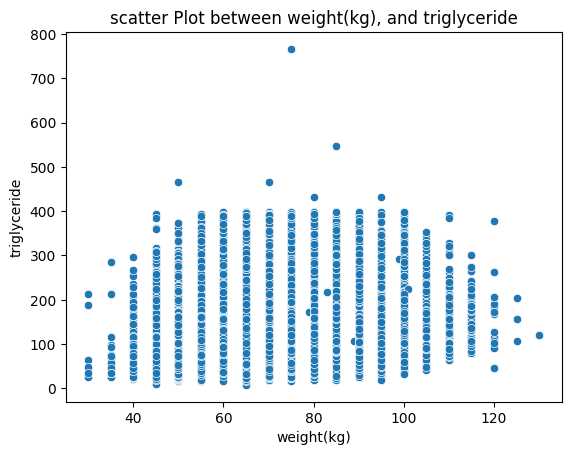

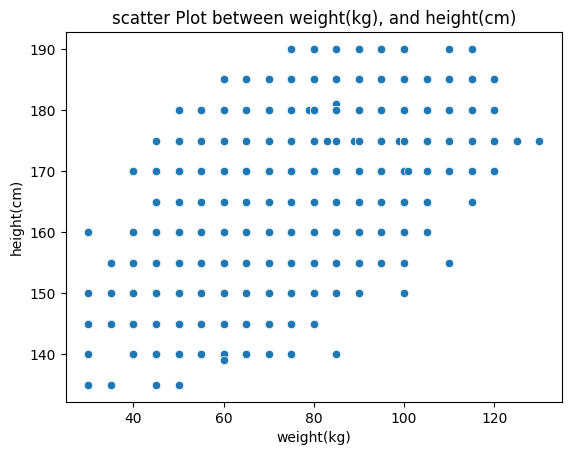

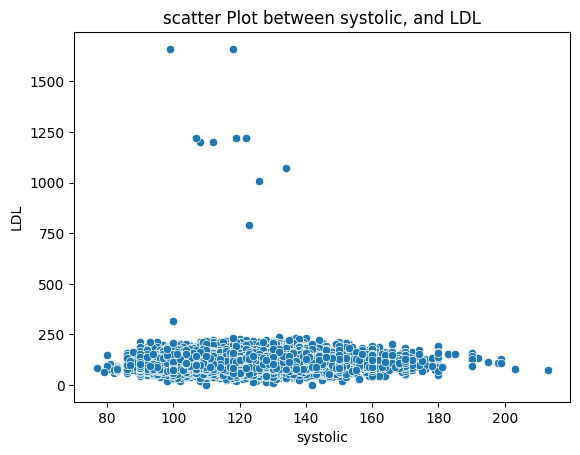

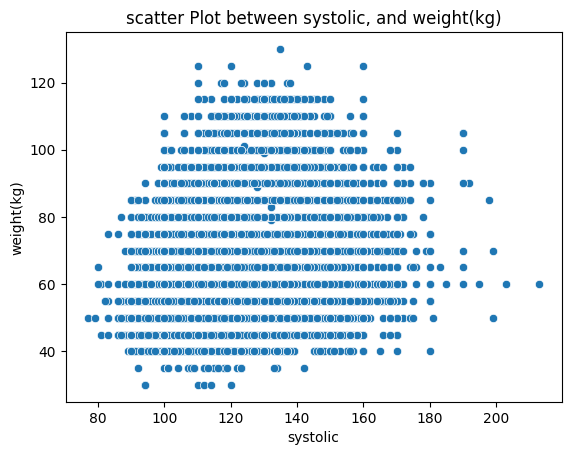

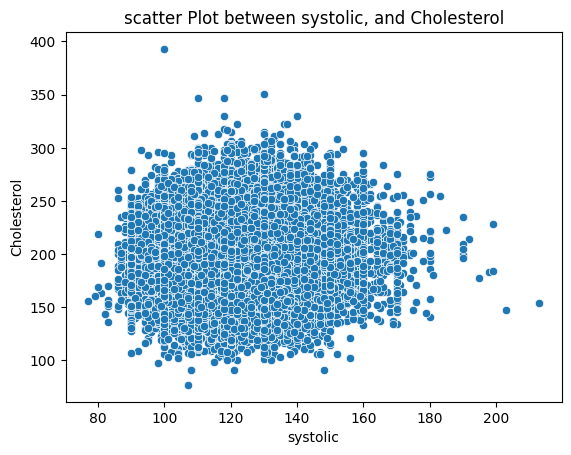

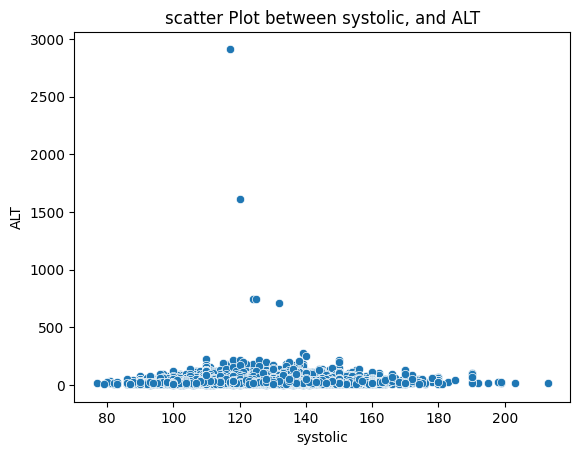

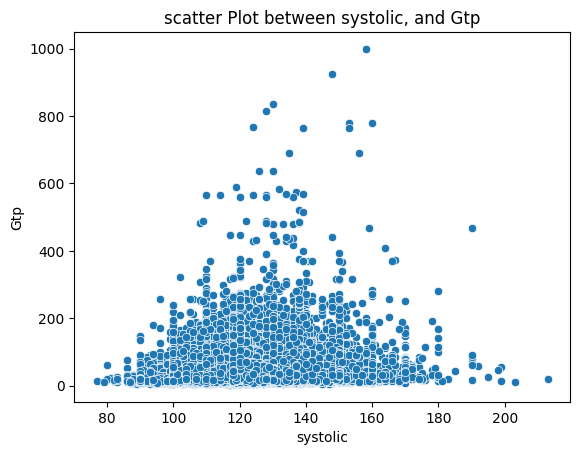

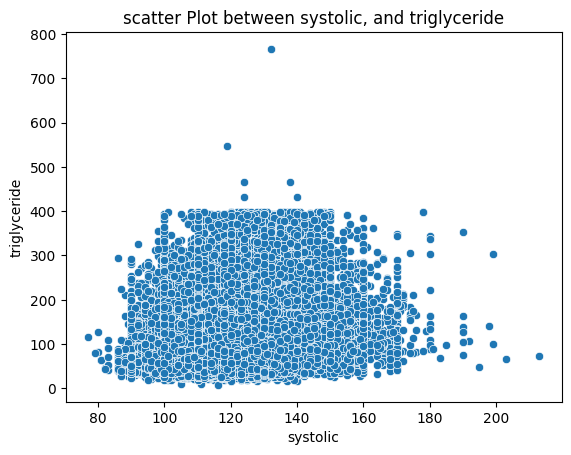

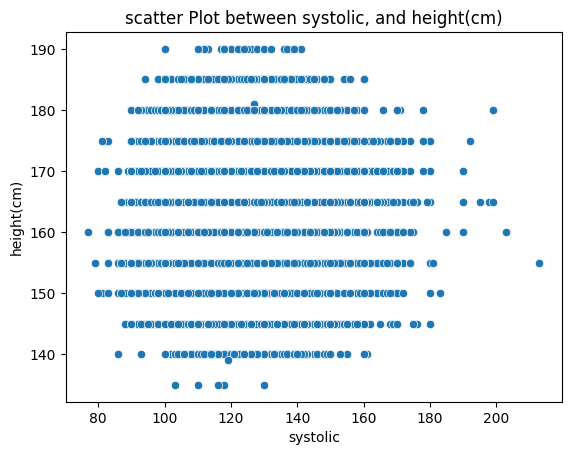

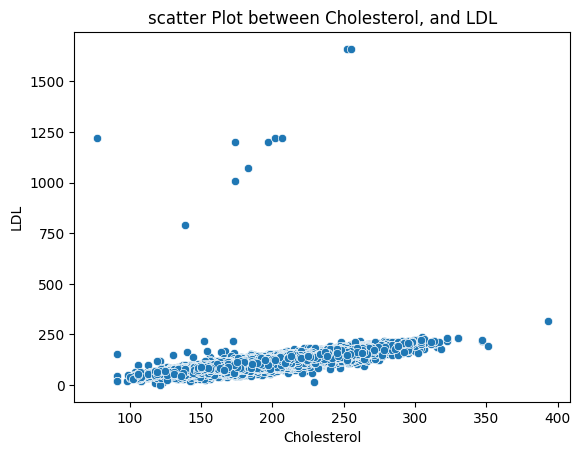

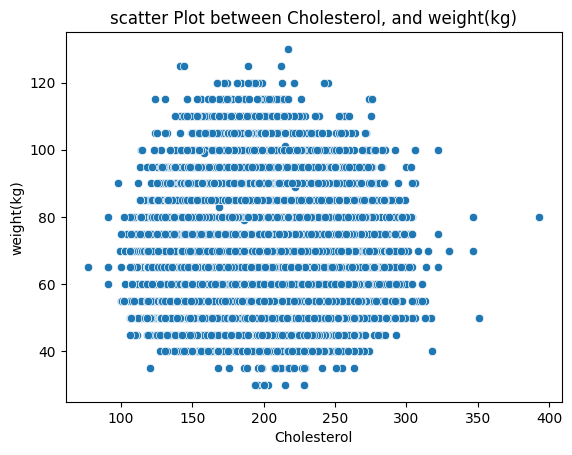

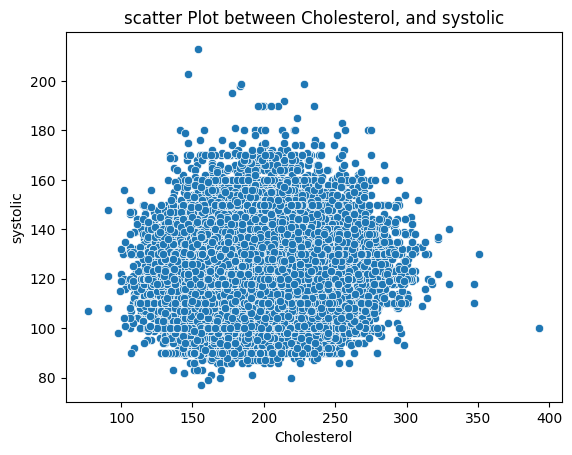

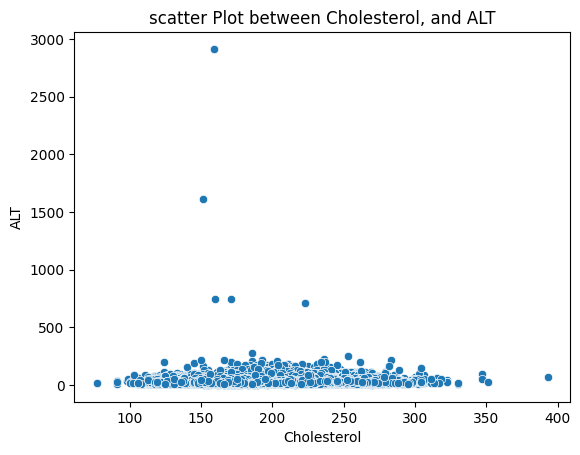

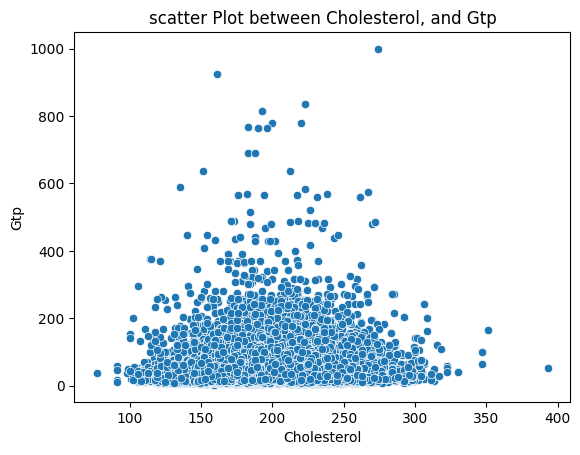

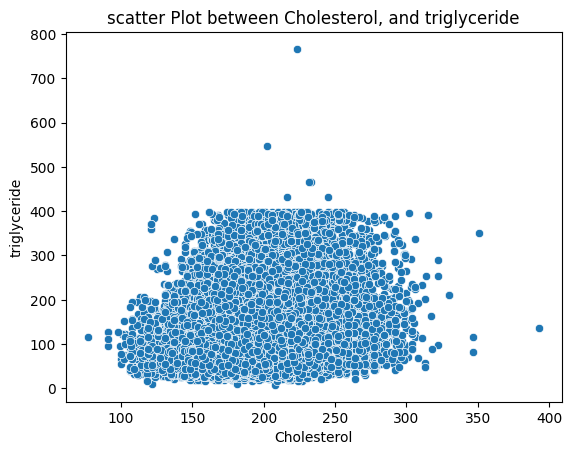

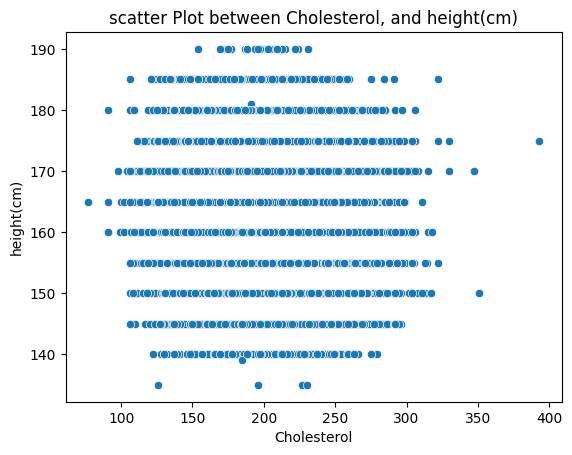

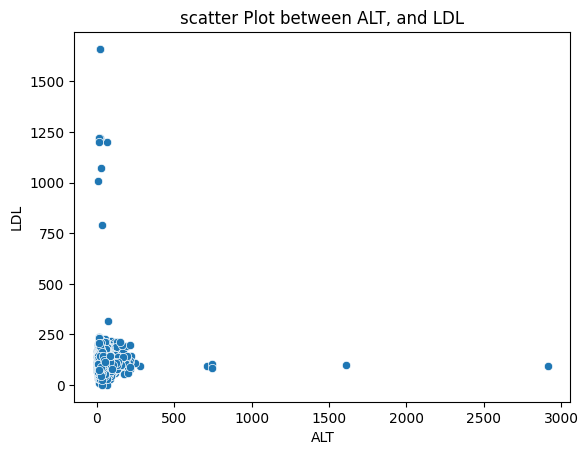

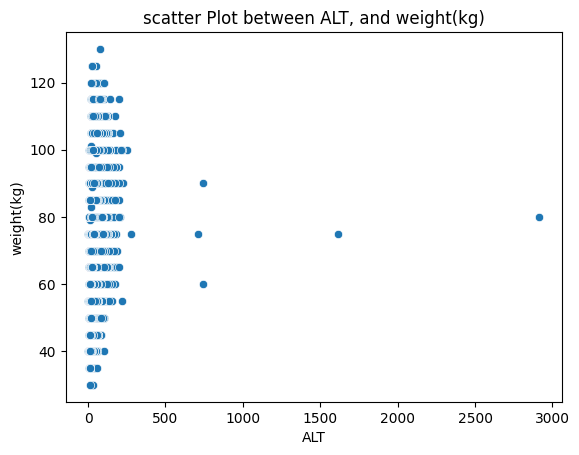

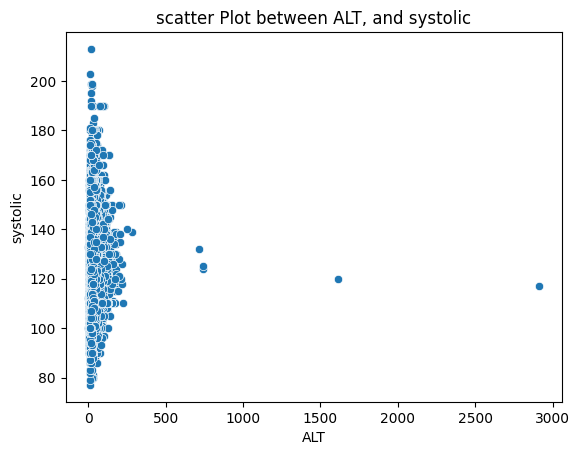

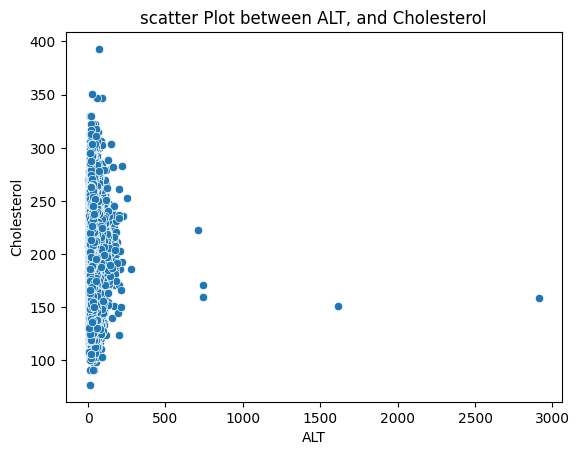

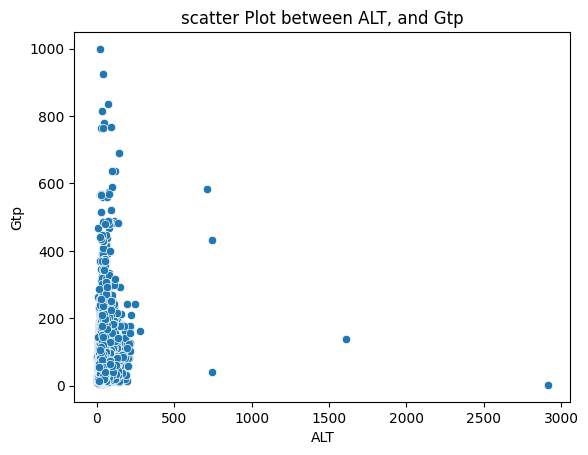

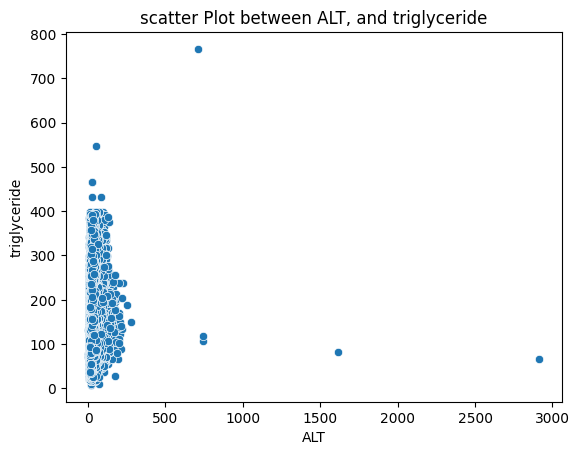

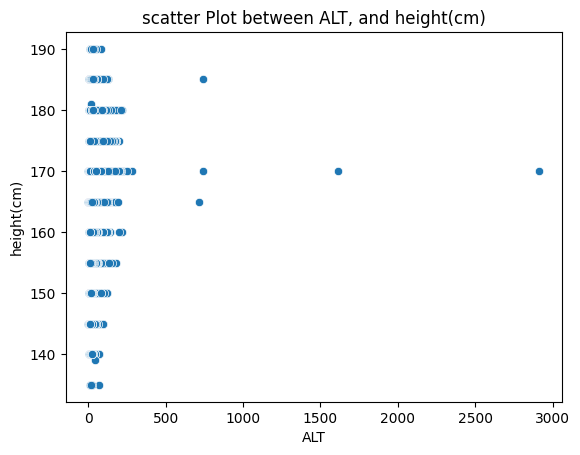

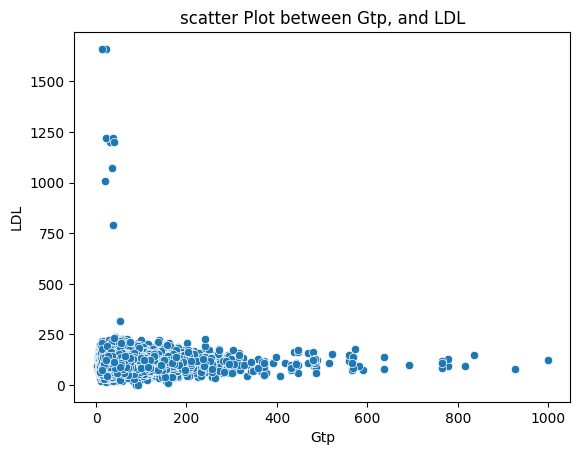

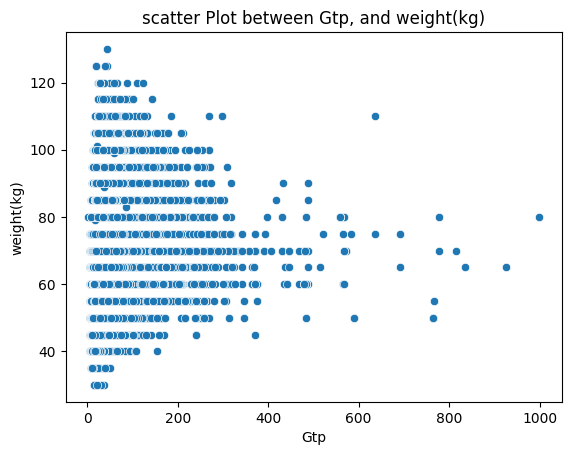

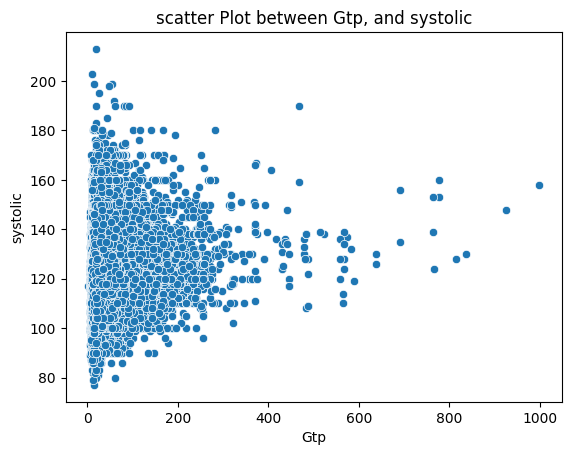

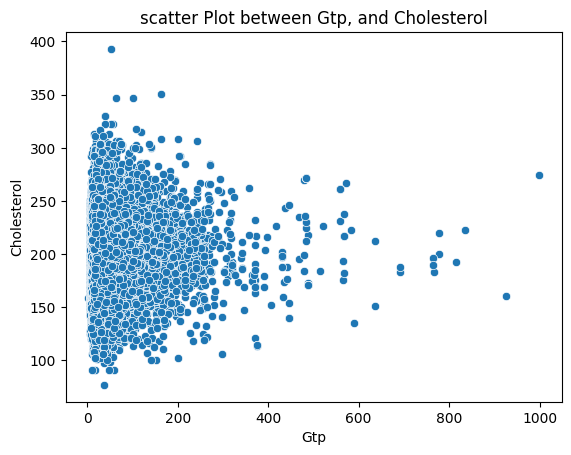

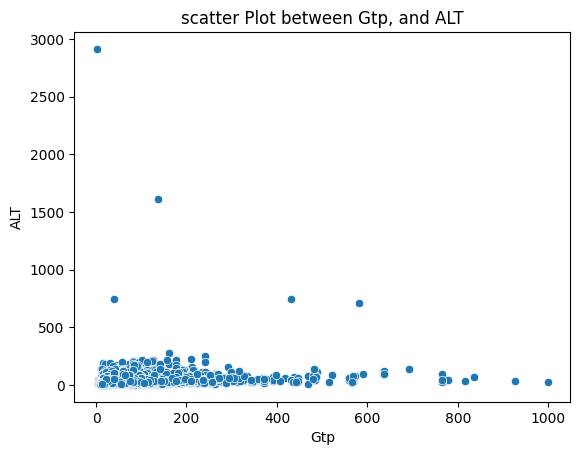

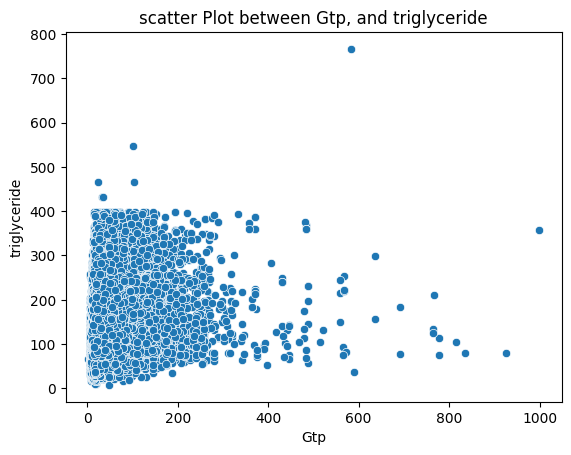

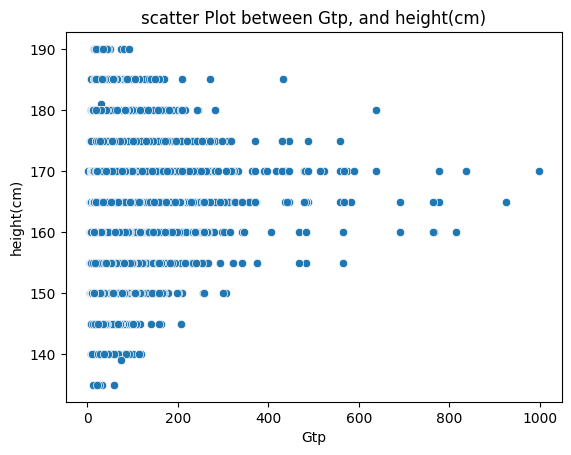

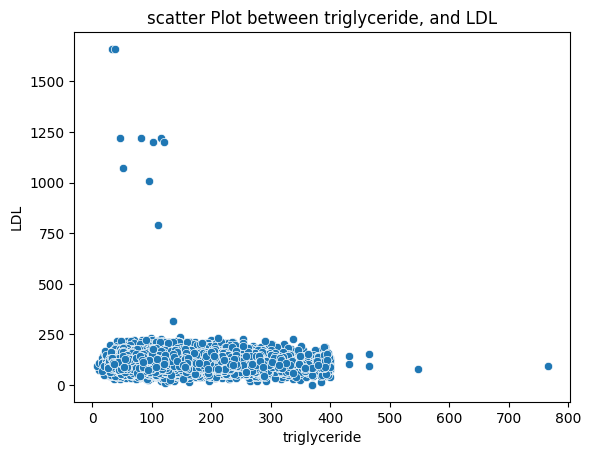

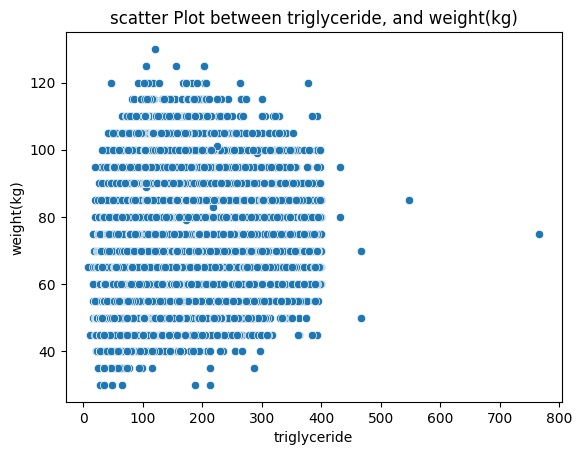

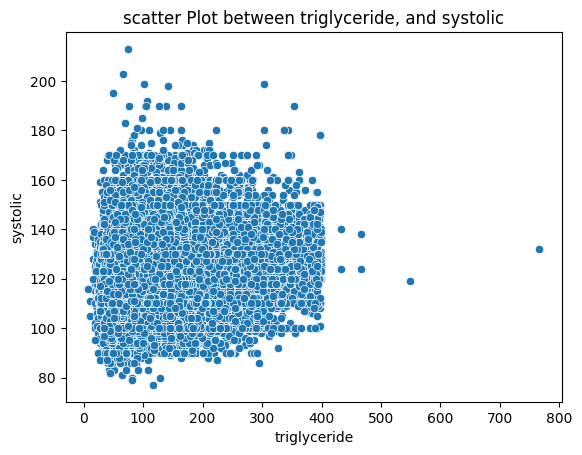

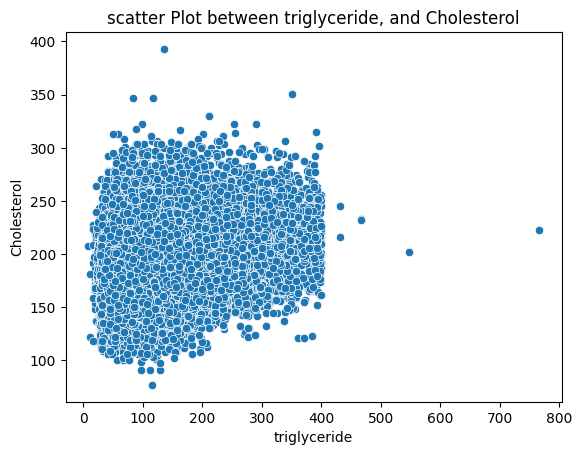

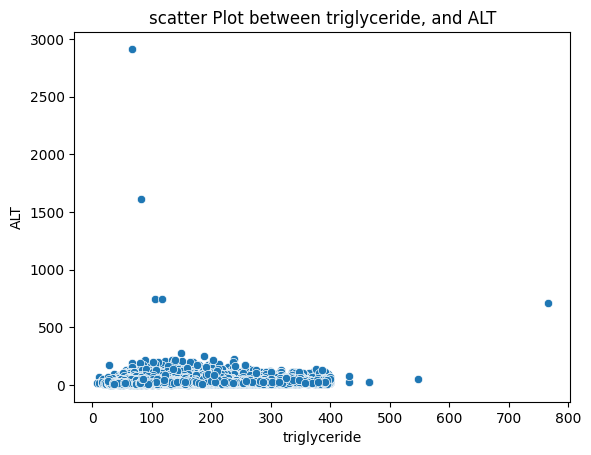

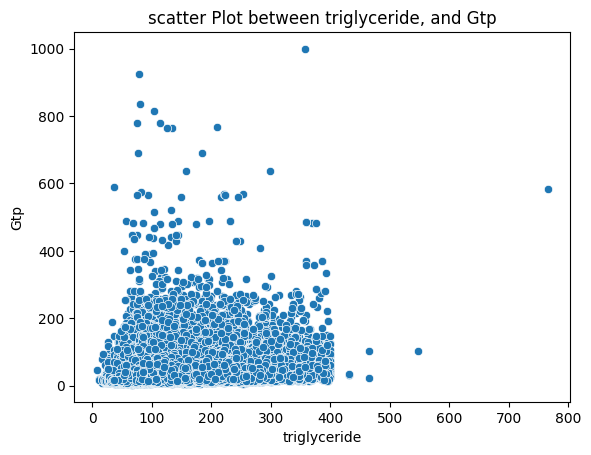

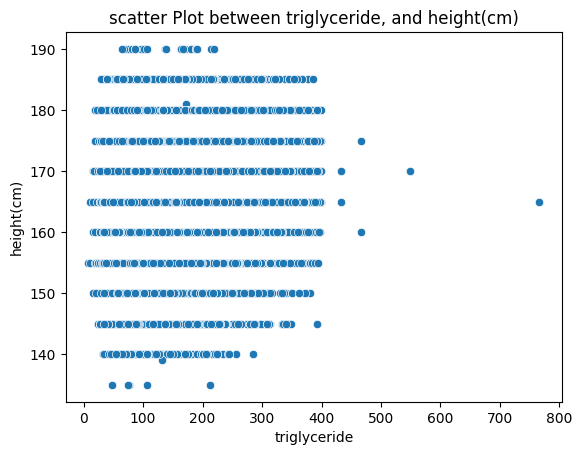

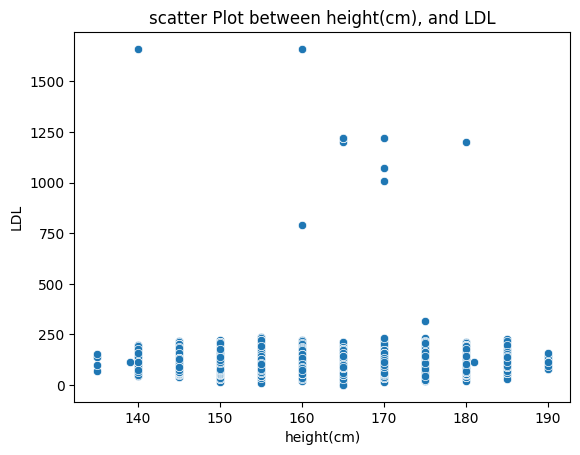

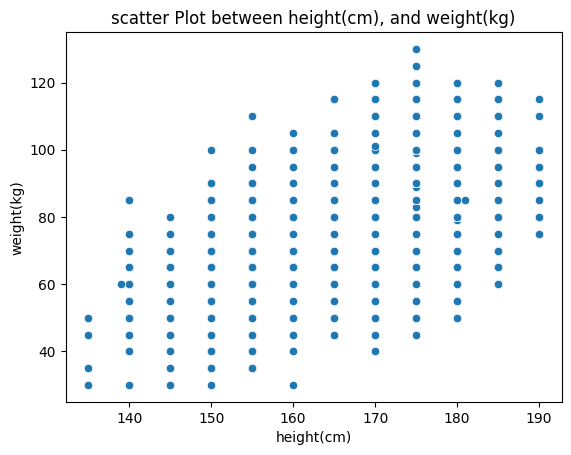

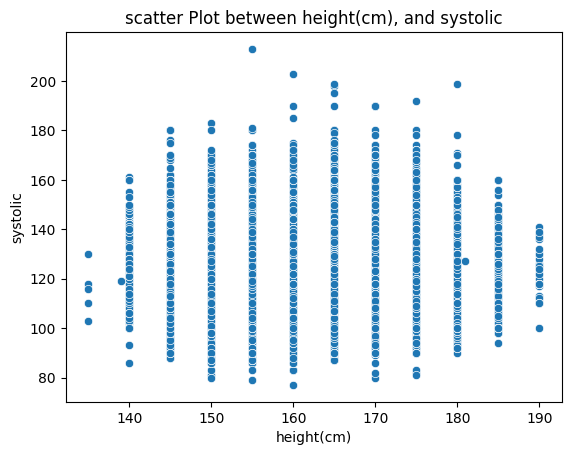

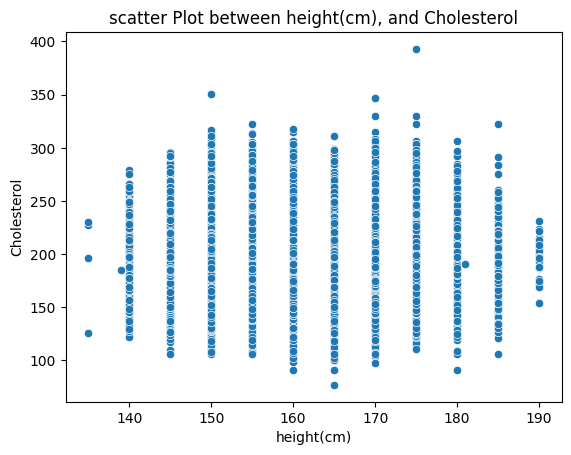

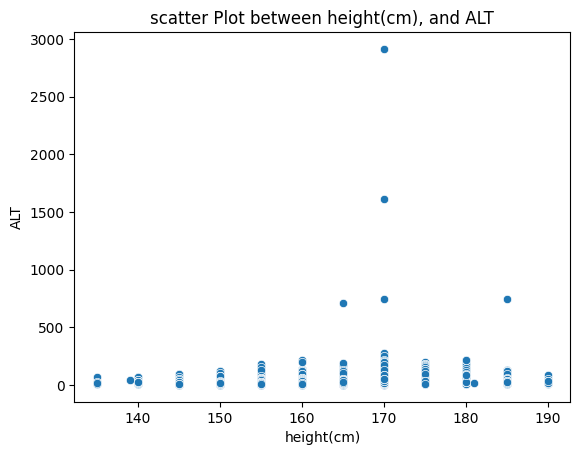

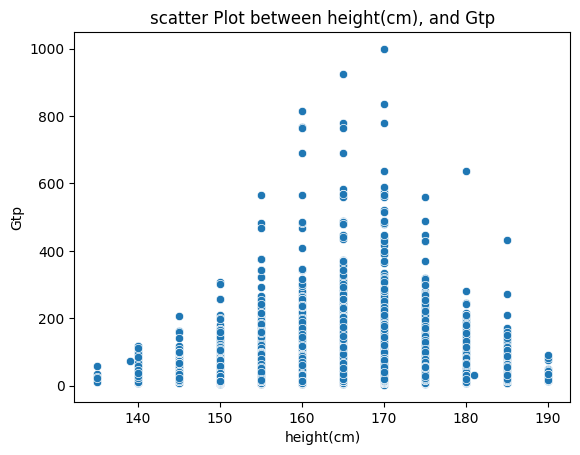

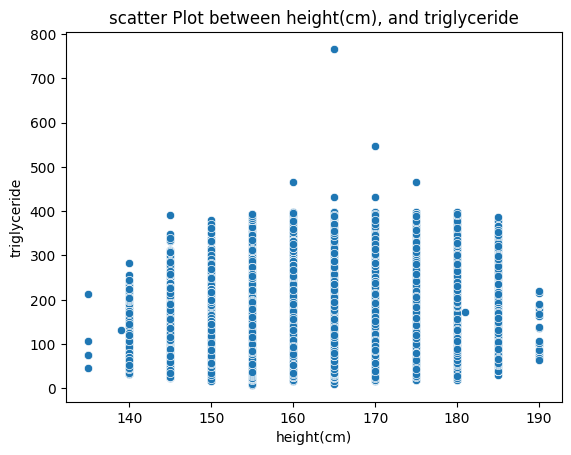

In [15]:
for n in numerical : 
    for n2 in  numerical: 
        if n == n2 :
            continue  
        # x,y =n,n2 
        sns.scatterplot(data=df_train, x=n, y=n2)
        plt.ylabel(n2)
        plt.xlabel(n)
        plt.title(f'scatter Plot between {n}, and {n2}')
        plt.show()

Multi varient 
['Urine protein', 'dental caries', 'smoking']
['LDL', 'weight(kg)', 'systolic', 'Cholesterol', 'ALT', 'Gtp', 'triglyceride', 'height(cm)']

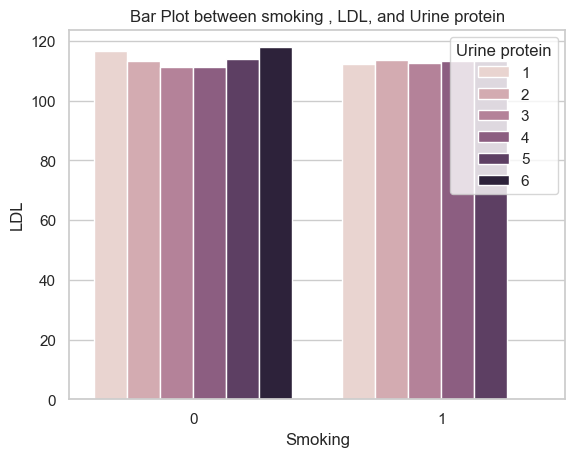

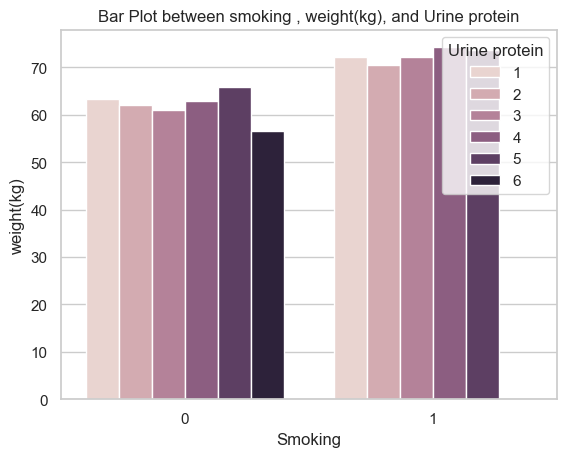

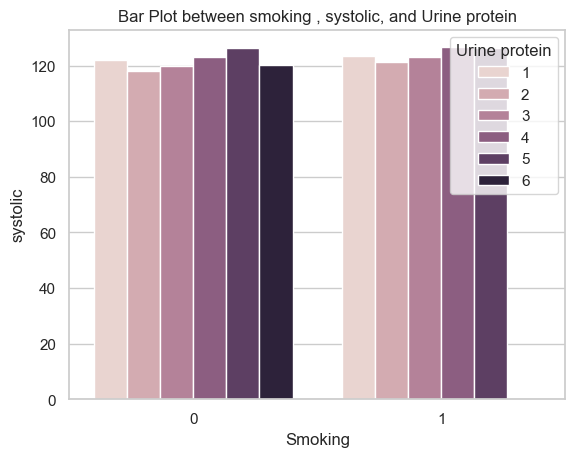

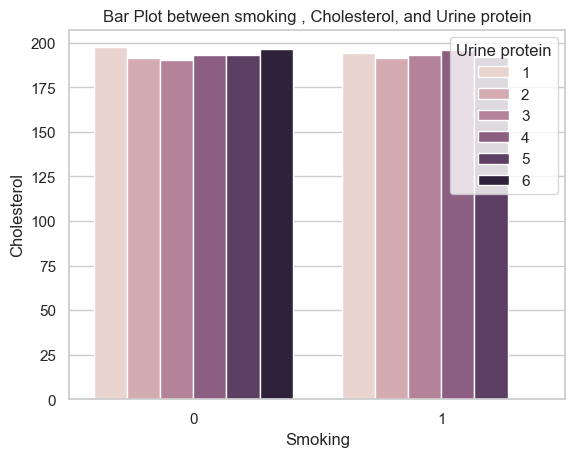

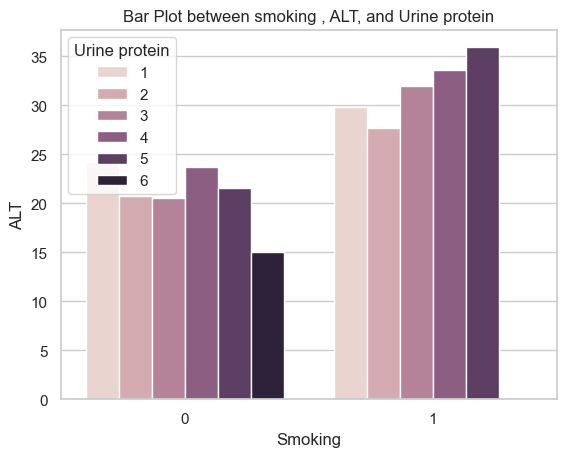

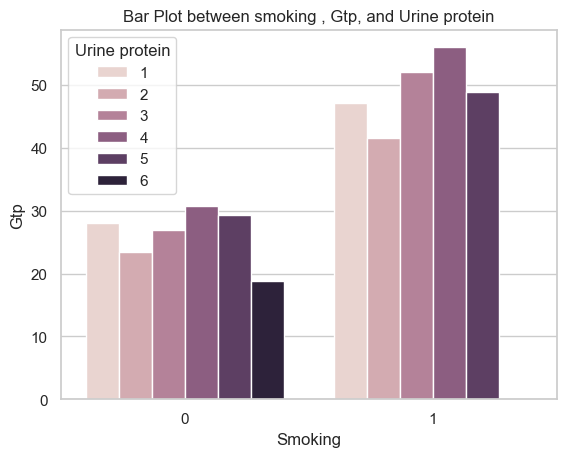

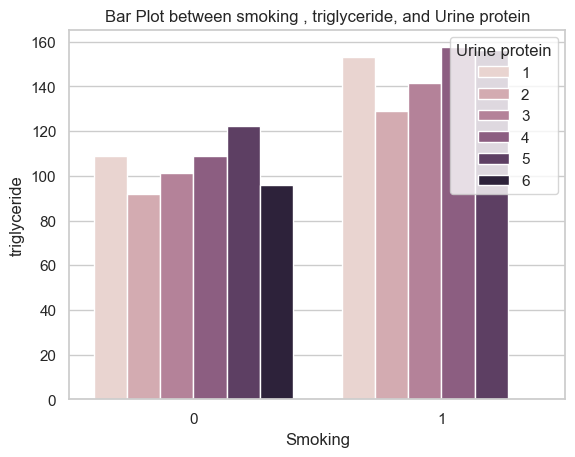

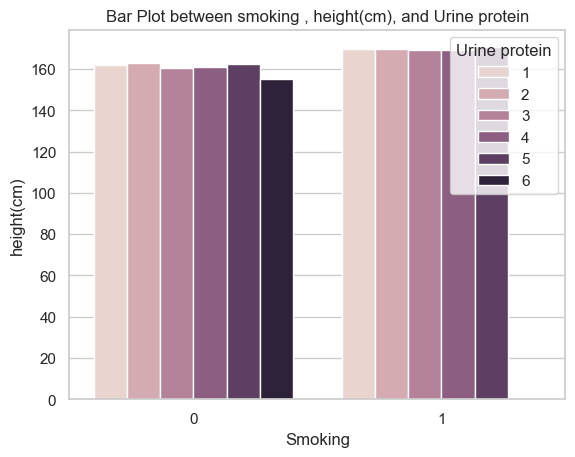

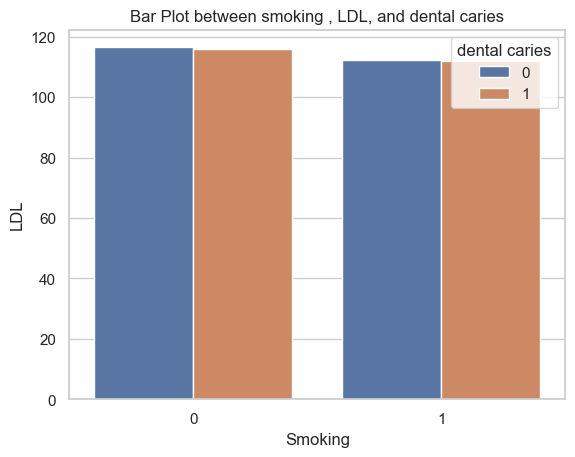

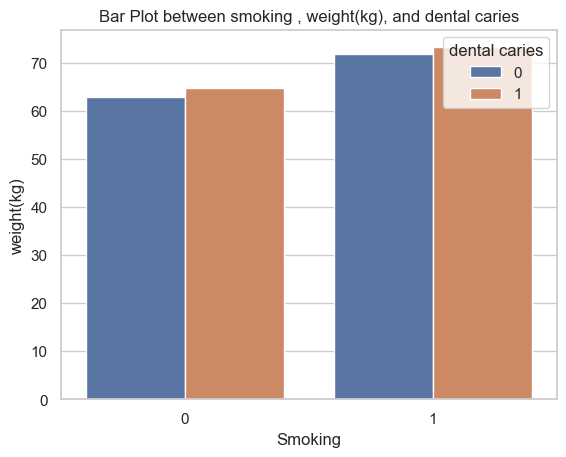

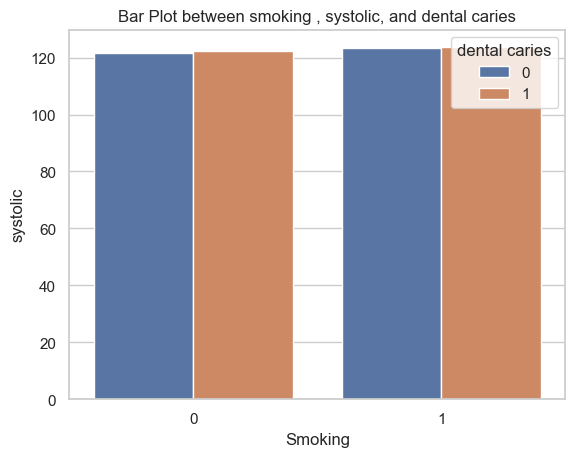

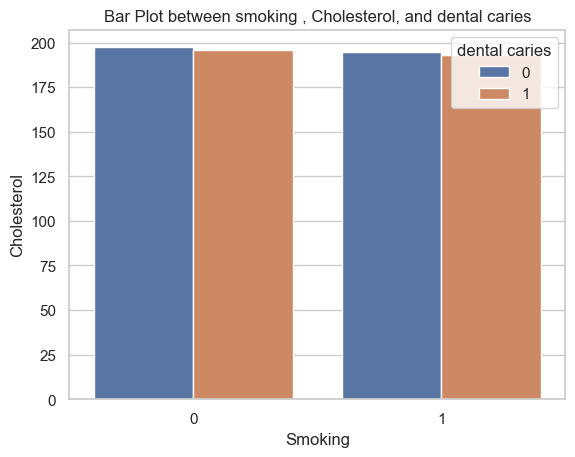

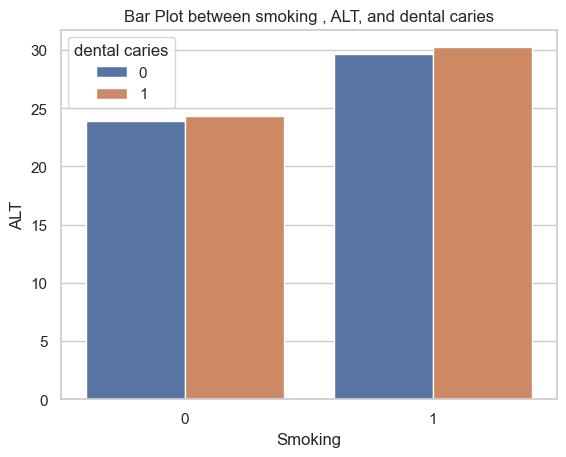

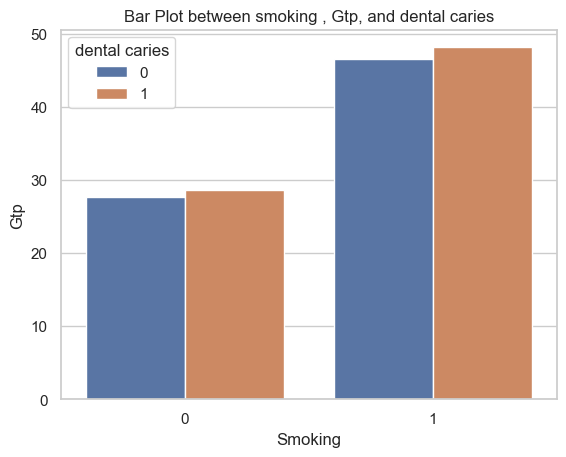

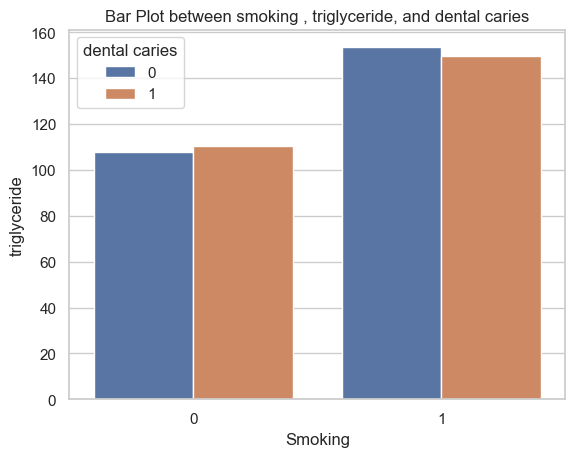

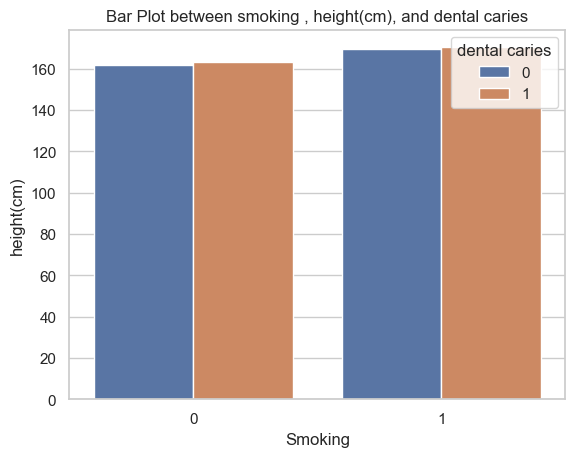

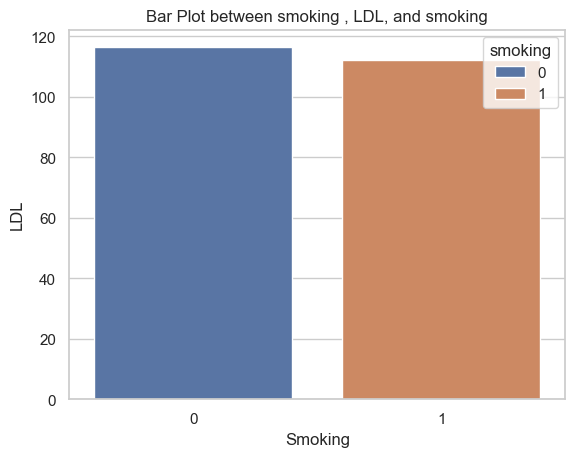

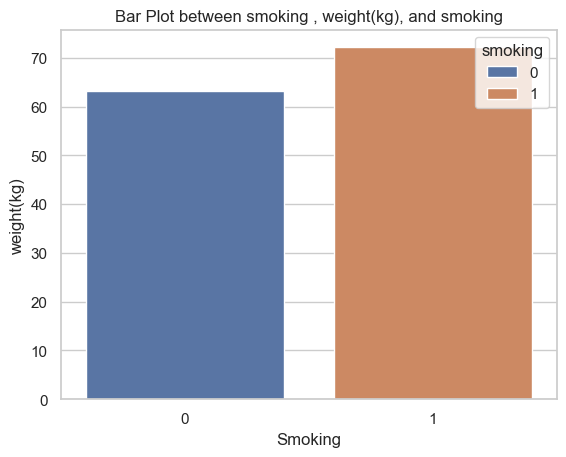

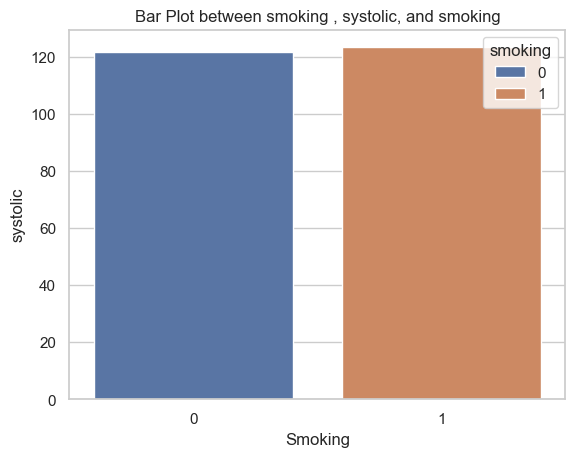

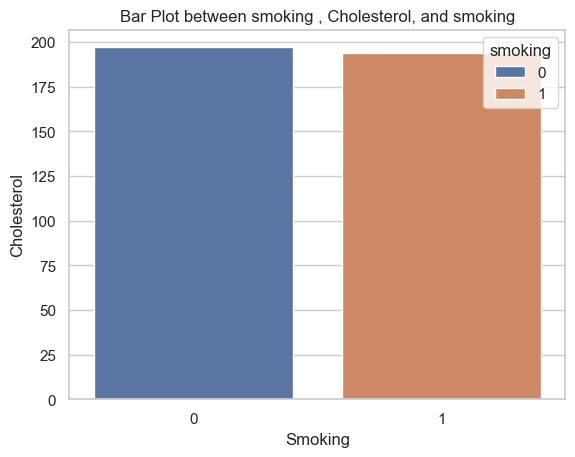

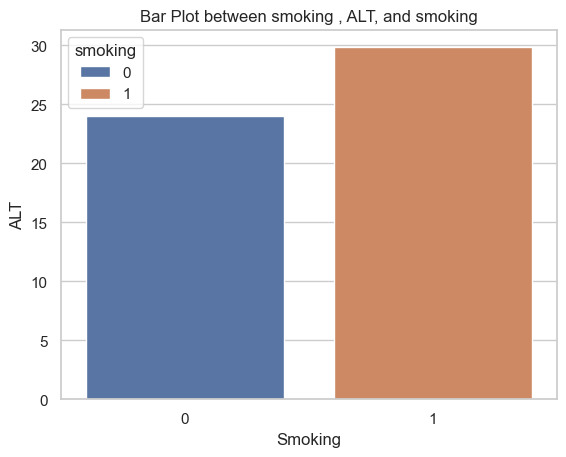

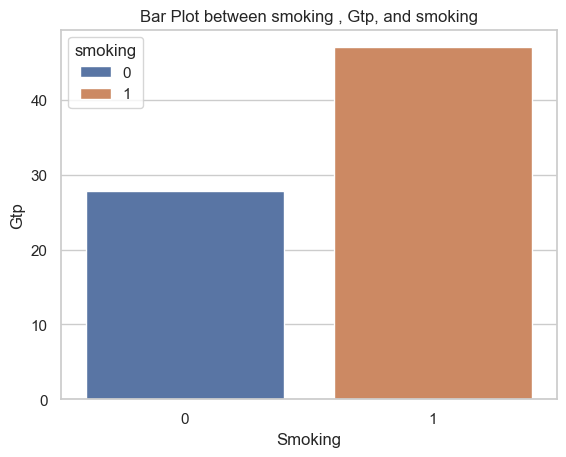

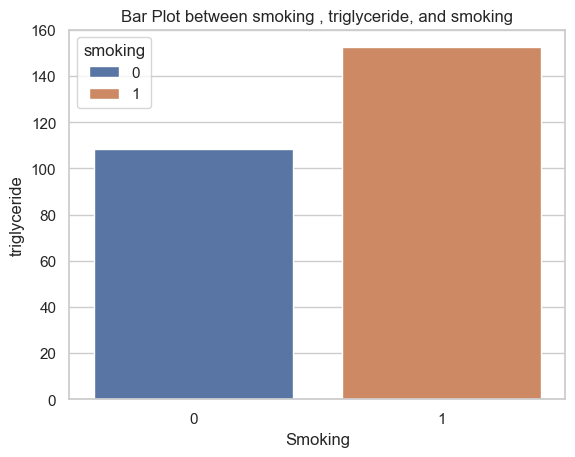

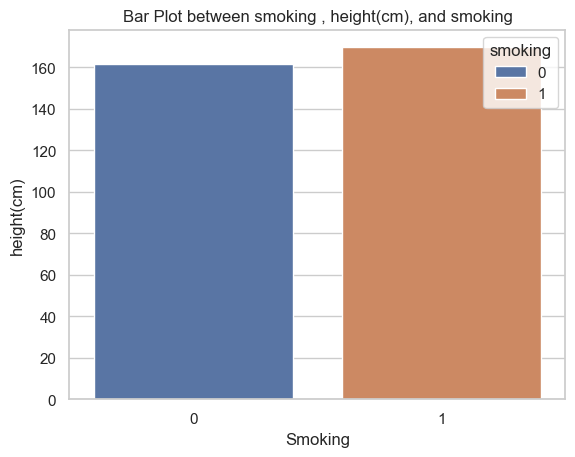

In [16]:
for category in cat:
    for num in numerical:
        sns.set(style="whitegrid")

        # Use 'hue' parameter to represent the third variable with color
        sns.barplot(x='smoking', y= num, hue= category, data=df, errorbar=None)

        # Add labels and title
        plt.xlabel('Smoking')
        plt.ylabel(num)
        plt.title(f'Bar Plot between smoking , {num}, and {category}')

        # Show the plot
        plt.show()